# Проект: Обучение с учителем: качество модели

## Структура 

 - Описание проекта
 - Описание данные
 - План проекта
 - Шаг 0. Импорт библиотек и системные настройки
 - Шаг 1. Загрузка данных
 - Шаг 2. Предобработка данных
 - Шаг 3. Исследовательский анализ данных
 - Шаг 4. Объединение таблиц
 - Шаг 5. Корреляционный анализ
 - Шаг 6. Использование пайплайнов
 - Шаг 7. Анализ важности признаков
 - Шаг 8. Сегментация покупателей
 - Шаг 9. Общий вывод

## Описание проекта 

Интернет-магазин «В один клик» продаёт разные товары: для детей, для дома, мелкую бытовую технику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине и так знает большая часть целевой аудитории. Возможный выход — удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.
«В один клик» — современная компания, поэтому её руководство не хочет принимать решения просто так — только на основе анализа данных и бизнес-моделирования. У компании есть небольшой отдел цифровых технологий, и вам предстоит побыть в роли стажёра в этом отделе. 
Итак, вашему отделу поручили **разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность**.

## План проекта

1. Нужно промаркировать уровень финансовой активности постоянных покупателей.
В компании принято выделять два уровня активности:
 - «снизилась», если клиент стал покупать меньше товаров,
 - и «прежний уровень».
 
2. Нужно собрать данные по клиентам по следующим группам: 
 - Признаки, которые описывают коммуникацию сотрудников компании с клиентом.
 - Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.
 - Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.
 - Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

3. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.

4. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.

5. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

## Описание данных

### Диаграмма группы признаков (вместе с целевым)

![Ishikawa diagram](https://pictures.s3.yandex.net/resources/image_1695485033.png)


### market_file.csv

Таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении.

- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

### market_money.csv

Таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом.

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` — сумма выручки за период.

### market_time.csv

Таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода.

- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.

### money.csv

Таблица с данными о среднемесячной прибыли продавца за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.

- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

## Шаг 0. Импорт библиотек и системные настройки

In [1]:
!pip install phik -q
!pip install shap -q

In [2]:
import pandas as pd
import numpy as np
import shap

import matplotlib.pyplot as plt
import seaborn as sns

# для подсчёта корреляции между признаками разных типов данных
from phik import phik_matrix
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split

# Пайплайны
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# дополнительные классы для преобразования данных
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures

# класс для работы с пропусками
from sklearn.impute import SimpleImputer

# загружаем функцию для работы с метриками
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import GridSearchCV

# загружаем нужные модели
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [3]:
# сделаем вывод таблиц без пропуска колонок 
pd.set_option('display.max_colwidth', None)

In [4]:
# константы
RANDOM_STATE = 42
TEST_SIZE    = 0.25

## Шаг 1. Загрузка данных

In [ ]:
# смотрим на содержимое файла, разделители и пр.
!echo "market_file.csv  >>>>>>"
!head -n 2 ./datasets/market_file.csv
!echo "market_money.csv  >>>>>>"
!head -n 2 ./datasets/market_money.csv
!echo "market_time.csv  >>>>>>"
!head -n 2 ./datasets/market_time.csv
!echo "money.csv  >>>>>>"
!head -n 2 ./datasets/money.csv

market_file.csv  >>>>>>
id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
215348,Снизилась,премиум,да,3.4,5,121,0.0,Товары для детей,6,2,1,5
market_money.csv  >>>>>>
id,Период,Выручка
215348,препредыдущий_месяц,0.0
market_time.csv  >>>>>>
id,Период,минут
215348,текущий_месяц,14
money.csv  >>>>>>
id;Прибыль
215348;0,98


In [ ]:
df_market_file = pd.read_csv('./datasets/market_file.csv')

df_market_file.info()

df_market_file.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5


In [ ]:
df_market_money = pd.read_csv('./datasets/market_money.csv')

df_market_money.info()

df_market_money.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0


In [ ]:
df_market_time = pd.read_csv('./datasets/market_time.csv')

df_market_time.info()

df_market_time.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10


In [ ]:
df_money = pd.read_csv('./datasets/money.csv', sep=';')

df_money.info()

df_money.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"


<div class="alert alert-info">
Спасибо, полезно - буду использовать.
</div>

**Вывод**

 - Данные импортированы
 - В первом приближении - соответствуют описанию

## Шаг 2. Предобработка данных

 - названия колонок
 - пропуски
 - дубликаты
 - типы данных

**df_market_file** - названия колонок

In [10]:
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

In [11]:
# приведем наименования колонок к стандартному виду
df_market_file.columns = df_market_file.columns\
    .str.lower()\
    .str.replace(' ', '_')\
    .str.replace(',', '_')\
    .str.replace('__', '_')

df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

**df_market_money** - названия колонок

In [12]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [13]:
# приведем наименования колонок к стандартному виду
df_market_money.columns = df_market_money.columns\
    .str.lower()\
    .str.replace(' ', '_')\
    .str.replace(',', '_')\
    .str.replace('__', '_')

df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


**df_market_time** - названия колонок

In [14]:
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [15]:
# приведем наименования колонок к стандартному виду
df_market_time.columns = df_market_time.columns\
    .str.lower()\
    .str.replace(' ', '_')\
    .str.replace(',', '_')\
    .str.replace('__', '_')

df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


**df_money** - названия колонок

In [16]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


In [17]:
# приведем наименования колонок к стандартному виду
df_money.columns = df_money.columns\
    .str.lower()\
    .str.replace(' ', '_')\
    .str.replace(',', '_')\
    .str.replace('__', '_')

df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


**df_market_file** - пропуски

In [18]:
temp = df_market_file.copy()
missing = (pd.DataFrame({'Кол-во пропусков': temp.isnull().sum(), 'Доля пропусков': temp.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
id,0,0.000000
покупательская_активность,0,0.000000
тип_сервиса,0,0.000000
разрешить_сообщать,0,0.000000
маркет_актив_6_мес,0,0.000000
маркет_актив_тек_мес,0,0.000000
длительность,0,0.000000
акционные_покупки,0,0.000000
популярная_категория,0,0.000000
средний_просмотр_категорий_за_визит,0,0.000000


**df_market_money** - пропуски

In [19]:
temp = df_market_money.copy()
missing = (pd.DataFrame({'Кол-во пропусков': temp.isnull().sum(), 'Доля пропусков': temp.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
id,0,0.000000
период,0,0.000000
выручка,0,0.000000


**df_market_time** - пропуски

In [20]:
temp = df_market_time.copy()
missing = (pd.DataFrame({'Кол-во пропусков': temp.isnull().sum(), 'Доля пропусков': temp.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
id,0,0.000000
период,0,0.000000
минут,0,0.000000


**df_money**  - пропуски

In [21]:
temp = df_money.copy()
missing = (pd.DataFrame({'Кол-во пропусков': temp.isnull().sum(), 'Доля пропусков': temp.isnull().mean().round(4)})
           .style.background_gradient(cmap='coolwarm'))
missing

,Кол-во пропусков,Доля пропусков
id,0,0.000000
прибыль,0,0.000000


**df_market_file** - дубликаты

In [22]:
df_market_file.duplicated().sum()

0

**df_market_money** - дубликаты

In [23]:
df_market_money.duplicated().sum()

0

**df_market_time** - дубликаты

In [24]:
df_market_time.duplicated().sum()

0

**df_money** - дубликаты

In [25]:
df_money.duplicated().sum()

0

**df_market_file** - типы данных

In [26]:
df_market_file.head()

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандартт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4
4,215352,Снизилась,стандартт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2


In [27]:
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

**df_market_money** - типы данных

In [28]:
df_market_money.head()

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6


In [29]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


**df_market_time** - типы данных

In [30]:
df_market_time.head()

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13


In [31]:
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


**df_money** - типы данных

In [32]:
df_money.head()

,id,прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"


In [33]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB


In [34]:
# преобразуем тип данных для прибыли в числовой
# для этого будем использовать функцию

def str_to_float(string: str) -> float:
    """Функция принимает строку. Если в строке есть разделитель `,`
    функция заменяет `,` на `.`. Затем преобразует строку в float и 
    возвращает полученное значение.
    """
    try:
        return float(string.replace(',','.'))
    except Exception as e:
        print(f'Error: {e}')
        return np.nan
    
# примеры
test = [
    str_to_float(''),
    str_to_float('0,00'),
    str_to_float('0,75'),
    str_to_float('-0,75'),
    str_to_float('0.75'),
    str_to_float('199'),
    str_to_float('text')
]

for item in test:
    print(item, type(item))

Error: could not convert string to float: ''
Error: could not convert string to float: 'text'
nan <class 'float'>
0.0 <class 'float'>
0.75 <class 'float'>
-0.75 <class 'float'>
0.75 <class 'float'>
199.0 <class 'float'>
nan <class 'float'>


In [35]:
df_money['прибыль'] = df_money['прибыль'].apply(str_to_float)

df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


**Выводы**

 - названия колонок - для всех датафреймов переименованы в соответсивии со стандартом (snake_case)
 - пропуски - не обнаружены
 - дубликаты - не обнаружены
 - типы данных - тип obeject для `прибыль` из датафрейма df_money изменен на float  

## Шаг 3. Исследовательский анализ данных

 - Статистический анализ
 - Выбросы
 - Распределение

In [36]:
def visualize(dataframe: pd.DataFrame) -> None:
    """
    Принимает на вход датафрейм.
    Выводит графики для статистичесого анализа.
    Не возвращает ничего.
    """
    try:
        for column in dataframe.columns:
            if column == 'id':
                print(f'-----------------------------------------------------------')
                print(f'Анализ уникальных идентификаторов: {column}')
                unique_ids = dataframe['id'].nunique()
                print(f'Уникальных ID: {unique_ids} из {len(dataframe)} записей')
            elif pd.api.types.is_categorical_dtype(dataframe[column]) or pd.api.types.is_object_dtype(dataframe[column]):
                print(f'-----------------------------------------------------------')
                print(f'Распределение категориальной величины: {column}')
                plt.figure(figsize=(12, 6))
                dataframe[column].value_counts(ascending=True).plot.bar()
                plt.title(column)
                plt.show()
            # числовые данные
            elif pd.api.types.is_numeric_dtype(dataframe[column]):
                print(f'-----------------------------------------------------------')
                print(f'Распределение числовой величины: {column}')
                print(dataframe[column].describe())
                plt.figure(figsize=(12, 6))
                dataframe[column].hist(bins=100, alpha=0.5)
                plt.title(column)
                plt.show()

                dataframe.boxplot(column=[column])
                plt.title(column, fontsize=14, pad=20)
                plt.show()
            else:
                print(f'-----------------------------------------------------------')
                print(f'Тип данных в столбце {column} : {dataframe[column].dtype}')
    except Exception as e:
        print(f'Cant proceed column {column}. Error: {e}')

**df_market_file**

-----------------------------------------------------------
Анализ уникальных идентификаторов: id
Уникальных ID: 1300 из 1300 записей
-----------------------------------------------------------
Распределение категориальной величины: покупательская_активность


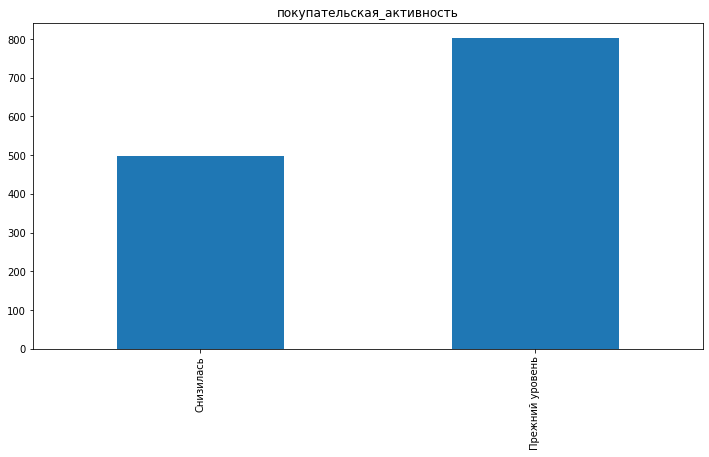

-----------------------------------------------------------
Распределение категориальной величины: тип_сервиса


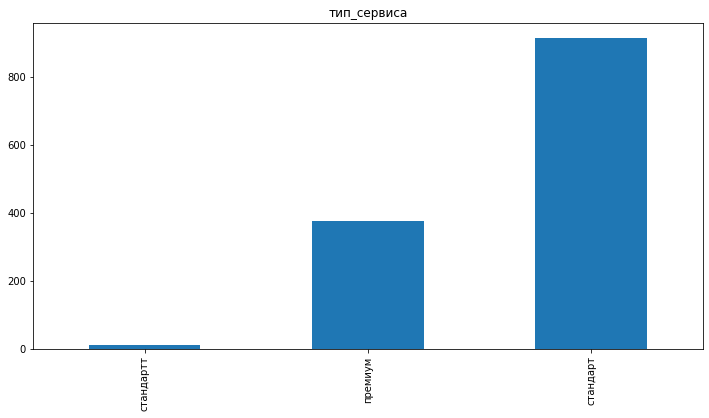

-----------------------------------------------------------
Распределение категориальной величины: разрешить_сообщать


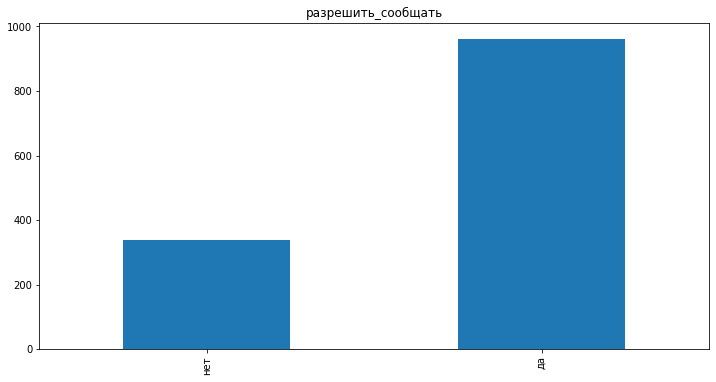

-----------------------------------------------------------
Распределение числовой величины: маркет_актив_6_мес
count    1300.000000
mean        4.253769
std         1.014814
min         0.900000
25%         3.700000
50%         4.200000
75%         4.900000
max         6.600000
Name: маркет_актив_6_мес, dtype: float64


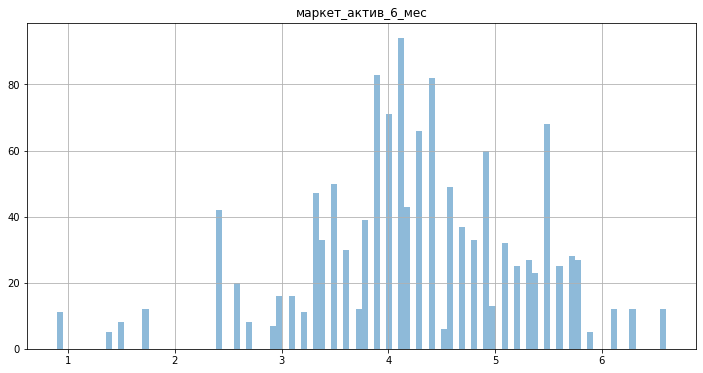

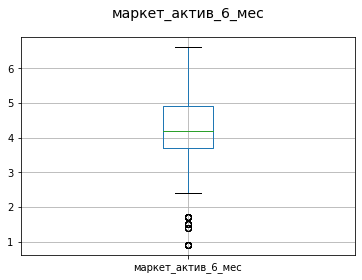

-----------------------------------------------------------
Распределение числовой величины: маркет_актив_тек_мес
count    1300.000000
mean        4.011538
std         0.696868
min         3.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: маркет_актив_тек_мес, dtype: float64


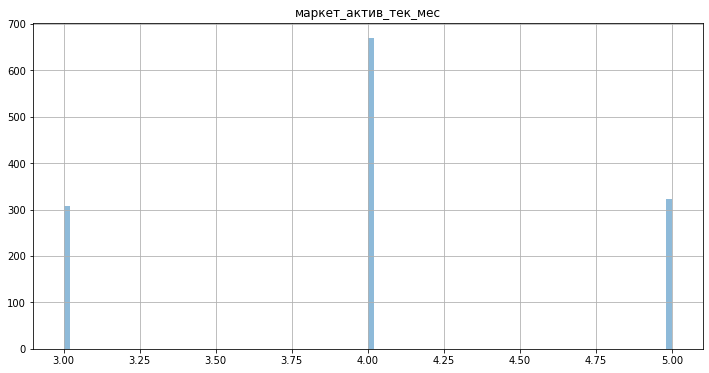

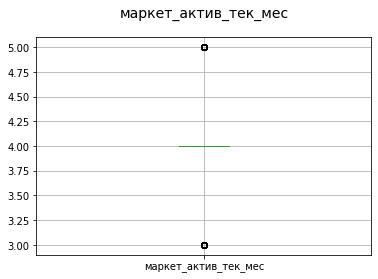

-----------------------------------------------------------
Распределение числовой величины: длительность
count    1300.000000
mean      601.898462
std       249.856289
min       110.000000
25%       405.500000
50%       606.000000
75%       806.000000
max      1079.000000
Name: длительность, dtype: float64


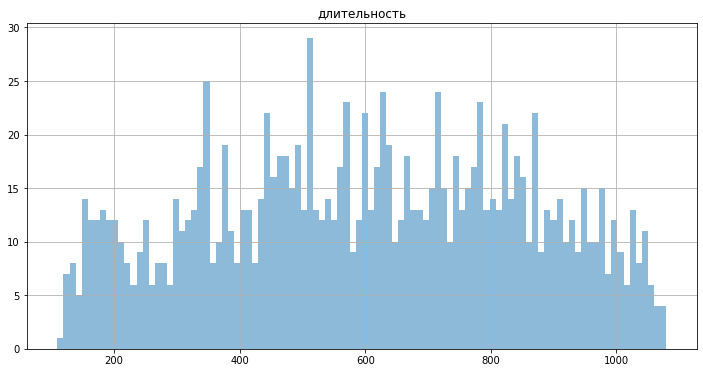

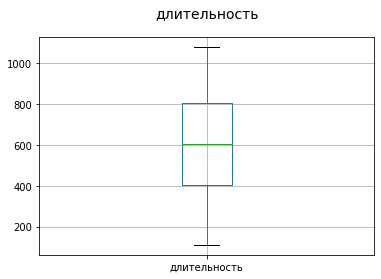

-----------------------------------------------------------
Распределение числовой величины: акционные_покупки
count    1300.000000
mean        0.319808
std         0.249843
min         0.000000
25%         0.170000
50%         0.240000
75%         0.300000
max         0.990000
Name: акционные_покупки, dtype: float64


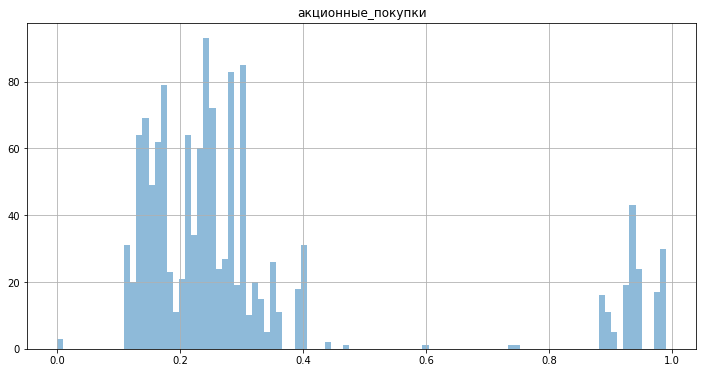

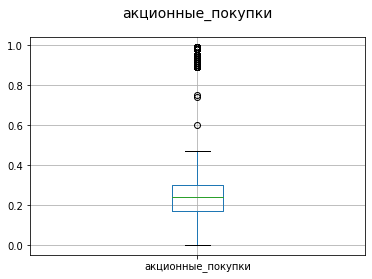

-----------------------------------------------------------
Распределение категориальной величины: популярная_категория


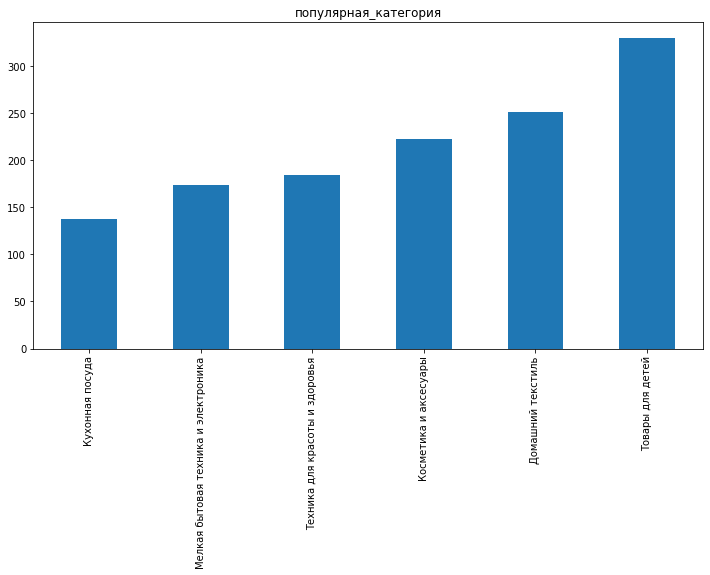

-----------------------------------------------------------
Распределение числовой величины: средний_просмотр_категорий_за_визит
count    1300.00000
mean        3.27000
std         1.35535
min         1.00000
25%         2.00000
50%         3.00000
75%         4.00000
max         6.00000
Name: средний_просмотр_категорий_за_визит, dtype: float64


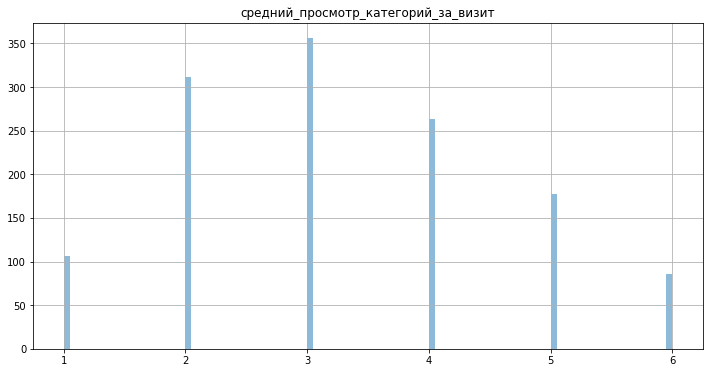

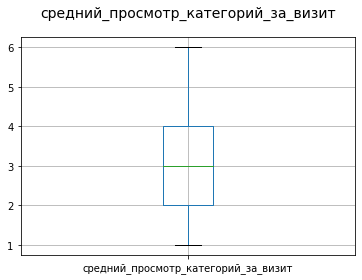

-----------------------------------------------------------
Распределение числовой величины: неоплаченные_продукты_штук_квартал
count    1300.000000
mean        2.840000
std         1.971451
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


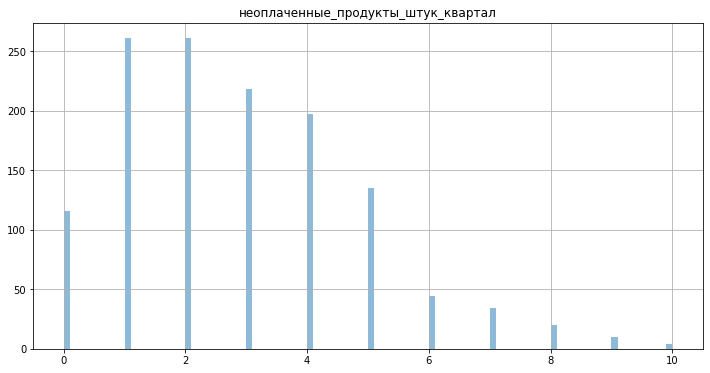

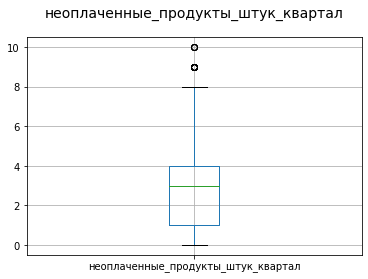

-----------------------------------------------------------
Распределение числовой величины: ошибка_сервиса
count    1300.000000
mean        4.185385
std         1.955298
min         0.000000
25%         3.000000
50%         4.000000
75%         6.000000
max         9.000000
Name: ошибка_сервиса, dtype: float64


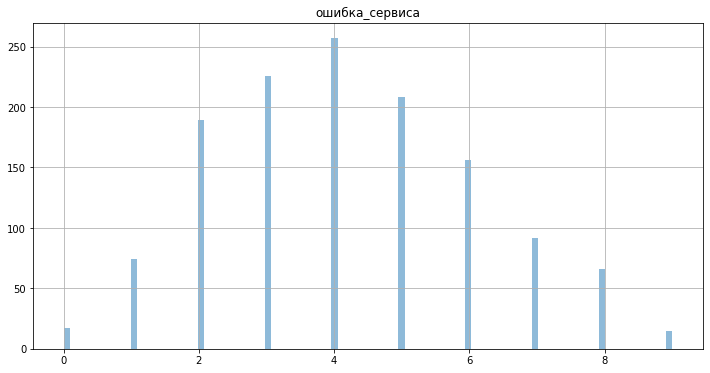

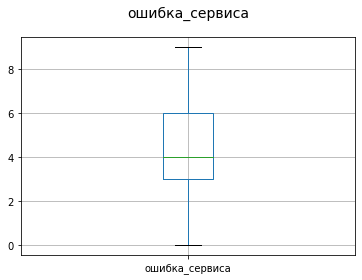

-----------------------------------------------------------
Распределение числовой величины: страниц_за_визит
count    1300.000000
mean        8.176923
std         3.978126
min         1.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        20.000000
Name: страниц_за_визит, dtype: float64


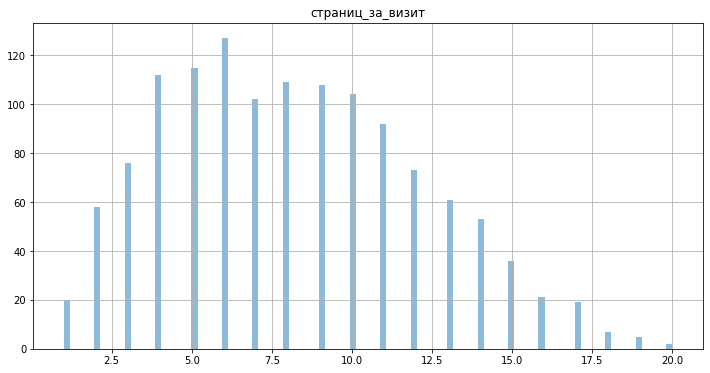

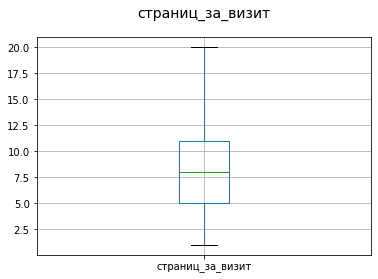

In [37]:
visualize(df_market_file)

**Действия**

 - Проверить Распределение числовой величины: маркет_актив_тек_мес
 - Опечатка в колонке `тип_сервиса`


In [38]:
df_market_file['маркет_актив_тек_мес'].value_counts()

4    669
5    323
3    308
Name: маркет_актив_тек_мес, dtype: int64

In [39]:
df_market_file['тип_сервиса'].value_counts()

стандарт     914
премиум      376
стандартт     10
Name: тип_сервиса, dtype: int64

In [40]:
# исправим ошибки в категориях
temp = df_market_file.copy()

df_market_file['тип_сервиса'] = df_market_file['тип_сервиса'].replace({'стандартт': 'стандарт'})

print(f'До исправления: {temp["тип_сервиса"].value_counts()}')
print(f'После исправления: {df_market_file["тип_сервиса"].value_counts()}')

До исправления: стандарт     914
премиум      376
стандартт     10
Name: тип_сервиса, dtype: int64
После исправления: стандарт    924
премиум     376
Name: тип_сервиса, dtype: int64


In [41]:
# проверим кол-во уникальных id пользователей
df_market_file['id'].nunique()

1300

**Выводы**

 - Опечатки исправлены


**Заметки**

 - `покупательская_активность` - категориальный - бинарный признак
 - `тип_сервиса` - категориальный - бинарный признак
 - `разрешить_сообщать` - категориальный - бинарный признак
 - `маркет_актив_6_мес` - количественный, числовой признак
 - `маркет_актив_тек_мес` - количественный - дискретный признак
 - `длительность` - количественный, числовой признак
 - `акционные_покупки` - количественный, числовой признак
 - `популярная_категория` - категориальный — номинальный, дискретный признак
 - `средний_просмотр_категорий_за_визит` - дискретный признак
 - `неоплаченные_продукты_штук_квартал` - дискретный признак
 - `ошибка_сервиса` - дискретный признак
 - `страниц_за_визит` - дискретный признак


**df_market_money**

-----------------------------------------------------------
Анализ уникальных идентификаторов: id
Уникальных ID: 1300 из 3900 записей
-----------------------------------------------------------
Распределение категориальной величины: период


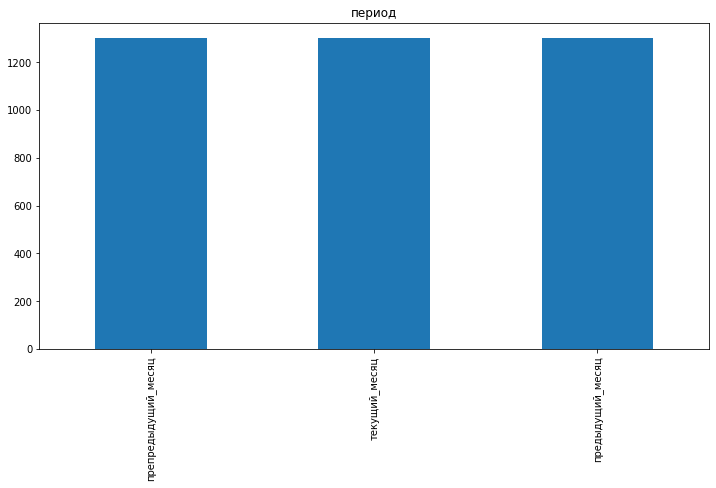

-----------------------------------------------------------
Распределение числовой величины: выручка
count      3900.000000
mean       5025.696051
std        1777.704104
min           0.000000
25%        4590.150000
50%        4957.500000
75%        5363.000000
max      106862.200000
Name: выручка, dtype: float64


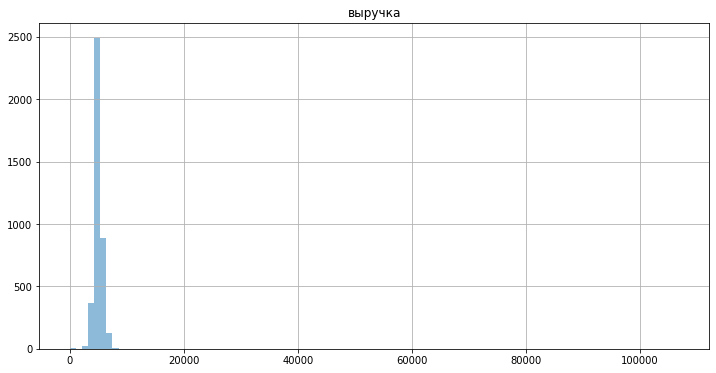

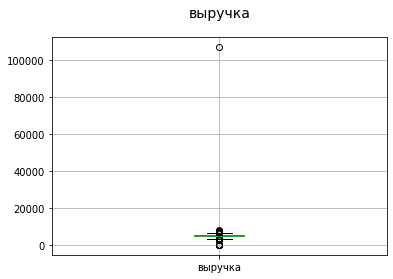

In [42]:
visualize(df_market_money)

In [43]:
# похоже есть аномалии
# большинство значений (75%) не превышают 5363
# проверим сколько значений больше 10_000
df_market_money[df_market_money['выручка'] > 10_000]

,id,период,выручка
98,215380,текущий_месяц,106862.2


-----------------------------------------------------------
Анализ уникальных идентификаторов: id
Уникальных ID: 1300 из 3899 записей
-----------------------------------------------------------
Распределение категориальной величины: период


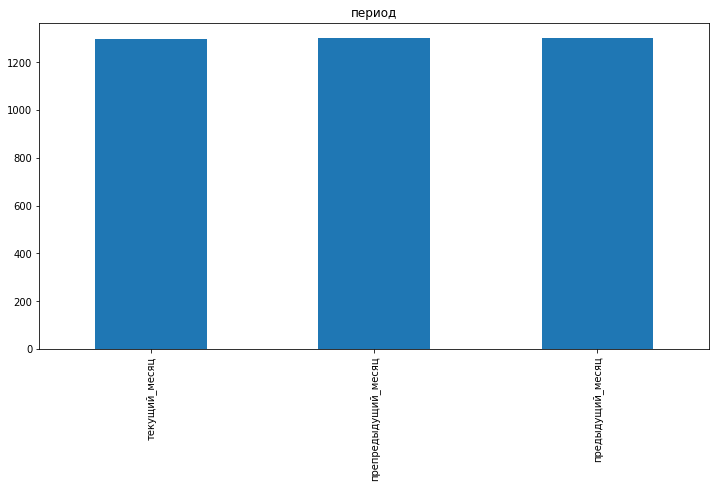

-----------------------------------------------------------
Распределение числовой величины: выручка
count    3899.00000
mean     4999.57743
std       706.99988
min         0.00000
25%      4590.10000
50%      4957.00000
75%      5363.00000
max      7799.40000
Name: выручка, dtype: float64


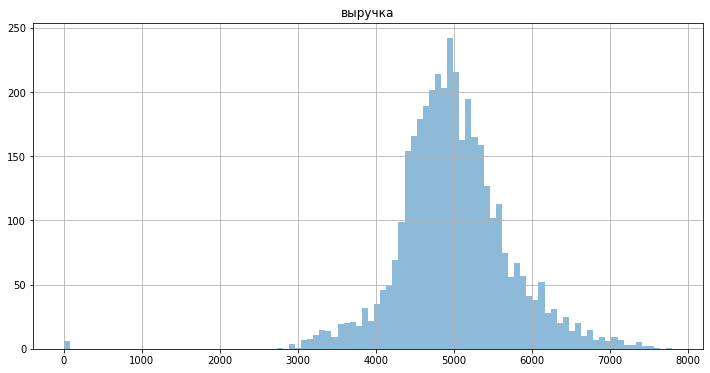

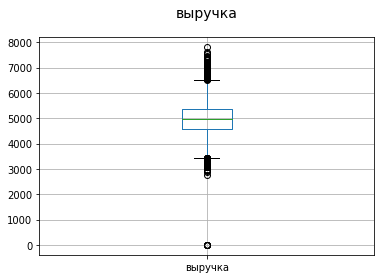

In [44]:
visualize(df_market_money[df_market_money['выручка'] < 10_000])

-----------------------------------------------------------
Анализ уникальных идентификаторов: id
Уникальных ID: 1300 из 3893 записей
-----------------------------------------------------------
Распределение категориальной величины: период


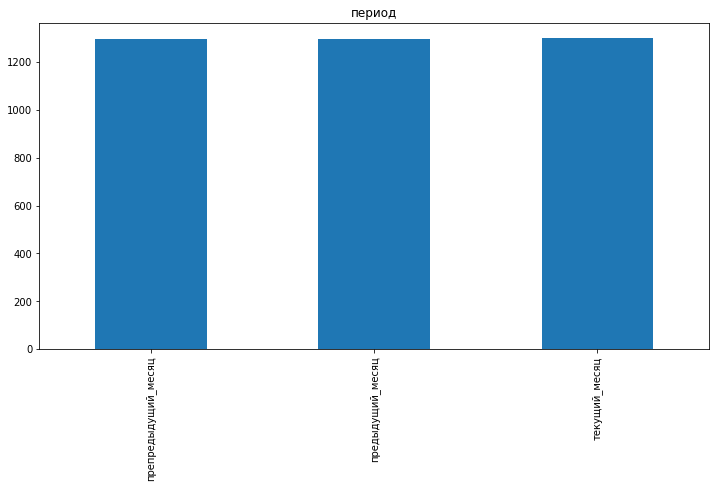

-----------------------------------------------------------
Распределение числовой величины: выручка
count    3893.000000
mean     5007.282918
std       679.724898
min      2758.700000
25%      4592.000000
50%      4959.000000
75%      5363.000000
max      7799.400000
Name: выручка, dtype: float64


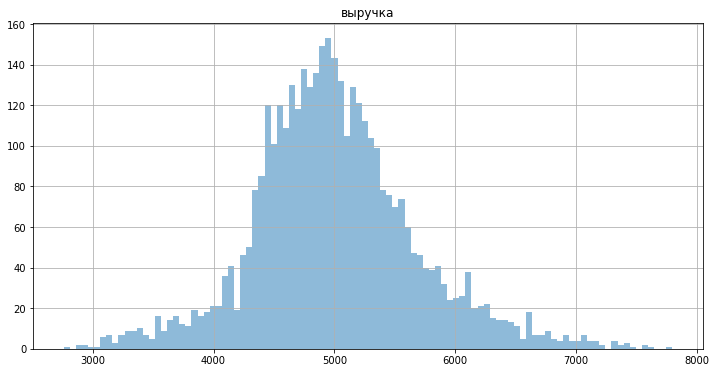

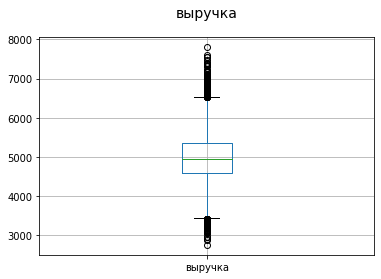

In [45]:
visualize(df_market_money[(df_market_money['выручка'] < 10_000) & (df_market_money['выручка'] > 0)])

> если исключить записи с нулевой выручкой - то нижний порог будет 2758.7

In [46]:
# посмотрим на сомнительные данные
df_market_money[(df_market_money['выручка'] > 10_000) | (df_market_money['выручка'] == 0)]

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0
98,215380,текущий_месяц,106862.2


**Вывод**

> Всего в таблице есть 3900 записей

> есть одно значение которое примерно в 20 раз больше чем 3899 других значений - запомним эту строку и удалим при слиянии

> есть 6 записей, в которых выручка равна нулю (рассматриваю удаление этих записей, поскольку кол-во ничтожно мало, однако на качество модели можно немного повлиять в лучшую сторону)

 - кол-во уникальных идентификаторов пользователей совпадает с предыдущими датасетами


**df_market_time**

-----------------------------------------------------------
Анализ уникальных идентификаторов: id
Уникальных ID: 1300 из 2600 записей
-----------------------------------------------------------
Распределение категориальной величины: период


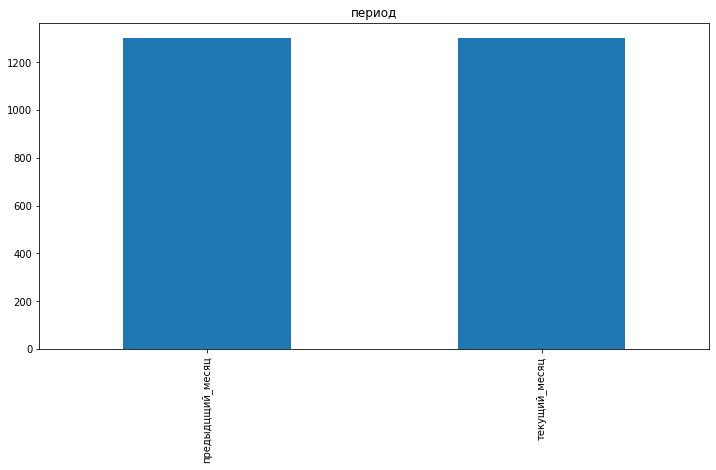

-----------------------------------------------------------
Распределение числовой величины: минут
count    2600.000000
mean       13.336154
std         4.080198
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max        23.000000
Name: минут, dtype: float64


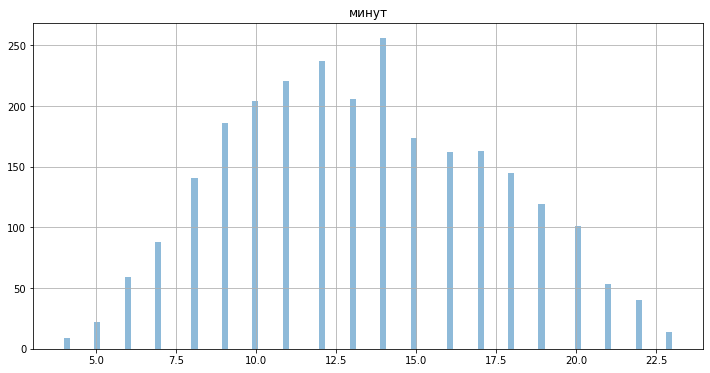

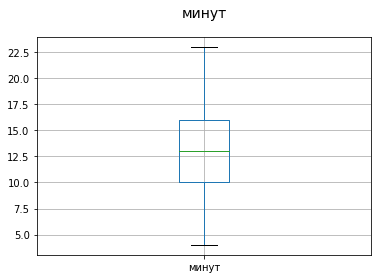

In [47]:
visualize(df_market_time)

**Вывод**

 - выбросов нет, аномалий нет
 - распределение похоже на нормальное
 - кол-во уникальных идентификаторов пользователей совпадает с предыдущими датасетами

**df_money**

-----------------------------------------------------------
Анализ уникальных идентификаторов: id
Уникальных ID: 1300 из 1300 записей
-----------------------------------------------------------
Распределение числовой величины: прибыль
count    1300.000000
mean        3.996631
std         1.013722
min         0.860000
25%         3.300000
50%         4.045000
75%         4.670000
max         7.430000
Name: прибыль, dtype: float64


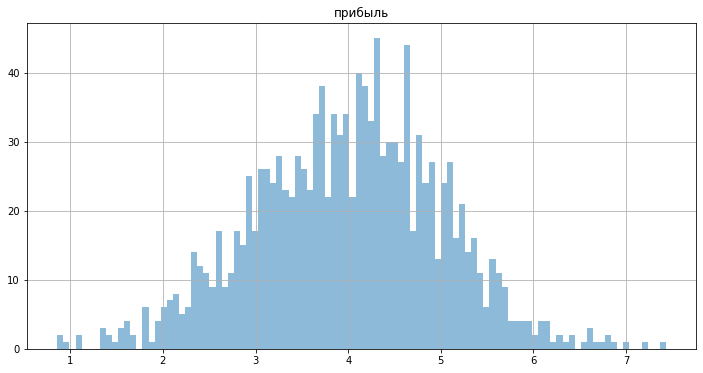

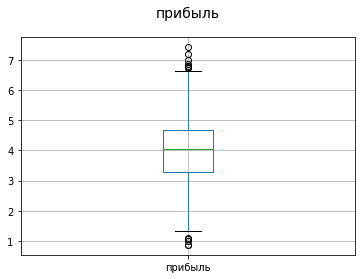

In [48]:
visualize(df_money)

**Вывод**

 - аномалий нет
 - есть выбросы
 - распределение похоже на нормальное
 - кол-во уникальных идентификаторов пользователей совпадает с предыдущими датасетами

**Отберите клиентов с покупательской активностью не менее трёх месяцев, то есть таких, которые что-либо покупали в этот период.**

Информация о клиентах (их `id`) и фактах оплаты (будем считать что это покупки) за три месяца есть в датафрейме `df_market_money`.

In [49]:
df_market_money.sample(10)

,id,период,выручка
1818,215954,препредыдущий_месяц,4644.0
1869,215971,предыдущий_месяц,5529.5
181,215408,текущий_месяц,5029.8
662,215568,предыдущий_месяц,2909.0
1582,215875,препредыдущий_месяц,5139.0
24,215356,текущий_месяц,4566.4
2054,216032,препредыдущий_месяц,5168.0
3629,216557,предыдущий_месяц,4774.0
1175,215739,предыдущий_месяц,5186.5
600,215548,препредыдущий_месяц,4228.0


In [50]:
df_market_money['период'].value_counts()

препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: период, dtype: int64

Как получается активность не менее трех месяцев:
 - 'препредыдущий_месяц' - первый месяц
 - 'предыдущий_месяц' - второй
 - 'текущий_месяц' - третий
 
В каждом месяце должна быть выручка отличная от `0`.
Поскольку в датафрейме (и исходной таблице) есть информация только о трех месяцах, перечисленных выше, то наличие хотябы одного нулевого значения в выручке будет говорить о том, что пользователь не соответствует критерию.
Найдем таких пользователей.

In [51]:
df_market_money[df_market_money['выручка'] == 0]

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [52]:
inactive_ids_num = len(df_market_money[df_market_money['выручка'] == 0].groupby('id'))
inactive_ids     = df_market_money[df_market_money['выручка'] == 0]['id'].unique().tolist()

print(f'Кол-во неактивных пользователей: {inactive_ids_num}')
print(f'ID неактивных пользователей: {inactive_ids}')

Кол-во неактивных пользователей: 3
ID неактивных пользователей: [215348, 215357, 215359]


In [53]:
# определим функцию для удаления записей о неактивных пользователях для всех датафреймов 
def remove_inactive(dataframe: pd.DataFrame, ids: list) -> pd.DataFrame:
    """
        Принимает на вход датафрейм и список значений из колонки 'id'.
        Удаляет строки по 'id'.
        Проверяет кол-во удаленных строк.
        Возвращает датафрейм без строк с указанным 'id' 
    """
    temp      = dataframe.copy()
    try:
        dataframe = dataframe[~dataframe['id'].isin(ids)]
    except Exception as e:
        print(f'Error: {e}')

    # Проверим сколько удалено строк датасета
    a, b = len(temp), len(dataframe)
    print(f'Было строк: {a}')
    print(f'Стало строк: {b}')
    print(f'Процент удаленных строк: {round((a-b)/a*100, 2)}')
    return dataframe

test_df = pd.DataFrame({
                'id': [1, 2, 3, 4, 5],
                'col2': ['A', 'B', 'C', 'D', 'E']
            })

print('test 1:')
ids = [2, 3, 10, 'oops', '']
print(remove_inactive(test_df, ids))
print()
print('test 2:')
ids = []
print(remove_inactive(test_df, ids))

test 1:
Было строк: 5
Стало строк: 3
Процент удаленных строк: 40.0
   id col2
0   1    A
3   4    D
4   5    E

test 2:
Было строк: 5
Стало строк: 5
Процент удаленных строк: 0.0
   id col2
0   1    A
1   2    B
2   3    C
3   4    D
4   5    E


In [54]:
# добавим id пользователя у которого аномальное значение
abnormal_money_id = df_market_money[df_market_money['выручка'] > 10_000]['id'].iloc[0]

inactive_ids.append(abnormal_money_id)

df_market_file  = remove_inactive(df_market_file, inactive_ids)
df_market_money = remove_inactive(df_market_money, inactive_ids)
df_market_time  = remove_inactive(df_market_time, inactive_ids)
df_money        = remove_inactive(df_money, inactive_ids)
    

Было строк: 1300
Стало строк: 1296
Процент удаленных строк: 0.31
Было строк: 3900
Стало строк: 3888
Процент удаленных строк: 0.31
Было строк: 2600
Стало строк: 2592
Процент удаленных строк: 0.31
Было строк: 1300
Стало строк: 1296
Процент удаленных строк: 0.31


**Вывод**

 - Удалили из всех датафреймов неактивных пользователей (тех, от которых хотя бы за один месяц из трех, нулевая выручка)
 - Удалили из всех датафреймов пользователя с аномальной выручкой

## Шаг 4. Объединение таблиц

In [55]:
df_market_file.head(3)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4


In [56]:
df_market_money.head(3)

,id,период,выручка
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0


In [57]:
# какие бывают периоды ?
df_market_money['период'].unique()

array(['препредыдущий_месяц', 'текущий_месяц', 'предыдущий_месяц'],
      dtype=object)

In [58]:
df_market_time.head()

,id,период,минут
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8
6,215351,текущий_месяц,13


In [59]:
# какие бывают периоды ?
df_market_time['период'].unique()

array(['текущий_месяц', 'предыдцщий_месяц'], dtype=object)

In [60]:
# проверим что для каждого пользователя в таблице есть только одна запись
len(df_market_file) == df_market_file['id'].nunique()

True

И так, имеет датафрейм, в котором каждая строка описывает свойства одного уникального пользователя - `df_market_file`.

Имеем датафреймы `df_market_money`, `df_market_time` - где для каждого пользователя указаны дополнительные свойства и значения.

Из `df_market_money` - получаем три дополнительных свойства:
  - 'препредыдущий_месяц'
  - 'текущий_месяц'
  - 'предыдущий_месяц'
  
Из `df_market_time` - получаем два дополнительных свойства:
  - 'текущий_месяц'
  - 'предыдцщий_месяц' (с опечаткой)
  
Добавим новые колонки в первый датафрейм и сохраним в ячейки значения из таблиц `df_market_money`, `df_market_time`.

In [61]:
# формируем первую колонку для добавления
rows = df_market_money['период'] == 'препредыдущий_месяц'
df_market_money_prop1 = df_market_money[rows]\
                            [['id', 'выручка']]\
                            .rename(columns={'выручка': 'препредыдущий_месяц_выручка'})

df_market_money_prop1

,id,препредыдущий_месяц_выручка
3,215349,4472.0
6,215350,4826.0
11,215351,4793.0
13,215352,4594.0
16,215353,5124.0
...,...,...
3885,216643,4704.0
3890,216644,5299.0
3893,216645,5334.0
3895,216646,4725.0


In [62]:
rows = df_market_money['период'] == 'предыдущий_месяц'
df_market_money_prop2 = df_market_money[rows]\
                            [['id', 'выручка']]\
                            .rename(columns={'выручка': 'предыдущий_месяц_выручка'})

df_market_money_prop2

,id,предыдущий_месяц_выручка
5,215349,5216.0
8,215350,5457.5
10,215351,6158.0
12,215352,5807.5
15,215353,4738.5
...,...,...
3886,216643,3664.0
3888,216644,4729.0
3891,216645,5160.0
3896,216646,4923.0


In [63]:
# формируем вторую колонку для добавления
rows = df_market_money['период'] == 'текущий_месяц'
df_market_money_prop3 = df_market_money[rows]\
                            [['id', 'выручка']]\
                            .rename(columns={'выручка': 'текущий_месяц_выручка'})

df_market_money_prop3

,id,текущий_месяц_выручка
4,215349,4971.6
7,215350,5058.4
9,215351,6610.4
14,215352,5872.5
17,215353,5388.5
...,...,...
3887,216643,4741.7
3889,216644,5353.0
3892,216645,5139.2
3894,216646,5224.6


In [64]:
# добавляем колонки к датафрейму
df_market_file_merged = df_market_file\
                        .merge(df_market_money_prop1, on='id')\
                        .merge(df_market_money_prop2, on='id')\
                        .merge(df_market_money_prop3, on='id')
# проверям визуально
df_market_file_merged

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,препредыдущий_месяц_выручка,предыдущий_месяц_выручка,текущий_месяц_выручка
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,4704.0,3664.0,4741.7
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,5299.0,4729.0,5353.0
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5334.0,5160.0,5139.2
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4725.0,4923.0,5224.6


In [65]:
# сравниваем датафрейм до и после
print(f'Форма датафрейма до изменений: {df_market_file.shape}')
print(f'Форма датафрейма после изменений: {df_market_file_merged.shape}')

Форма датафрейма до изменений: (1296, 13)
Форма датафрейма после изменений: (1296, 16)


In [66]:
# формируем четвертую колонку для добавления
rows = df_market_time['период'] == 'текущий_месяц'
df_market_money_prop4 = df_market_time[rows]\
                            [['id', 'минут']]\
                            .rename(columns={'минут': 'текущий_месяц_минут'})

df_market_money_prop4

,id,текущий_месяц_минут
2,215349,10
4,215350,13
6,215351,13
8,215352,11
11,215353,10
...,...,...
2591,216643,7
2593,216644,11
2595,216645,18
2597,216646,7


In [67]:
# формируем пятую колонку для добавления
rows = df_market_time['период'] == 'предыдцщий_месяц'
df_market_money_prop5 = df_market_time[rows]\
                            [['id', 'минут']]\
                            .rename(columns={'минут': 'предыдущий_месяц_минут'})

df_market_money_prop5

,id,предыдущий_месяц_минут
3,215349,12
5,215350,8
7,215351,11
9,215352,8
10,215353,10
...,...,...
2590,216643,14
2592,216644,12
2594,216645,12
2596,216646,18


In [68]:
# добавляем колонки к датафрейму
df_market_file_merged = df_market_file_merged\
                        .merge(df_market_money_prop4, on='id')\
                        .merge(df_market_money_prop5, on='id')

# проверям визуально
df_market_file_merged

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,препредыдущий_месяц_выручка,предыдущий_месяц_выручка,текущий_месяц_выручка,текущий_месяц_минут,предыдущий_месяц_минут
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,4472.0,5216.0,4971.6,10,12
1,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,4826.0,5457.5,5058.4,13,8
2,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,4793.0,6158.0,6610.4,13,11
3,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,4594.0,5807.5,5872.5,11,8
4,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,5124.0,4738.5,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,4704.0,3664.0,4741.7,7,14
1292,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,5299.0,4729.0,5353.0,11,12
1293,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5334.0,5160.0,5139.2,18,12
1294,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4725.0,4923.0,5224.6,7,18


In [69]:
# сравниваем датафрейм до и после всех добавлений
print(f'Форма датафрейма до изменений: {df_market_file.shape}')
print(f'Форма датафрейма после всех изменений: {df_market_file_merged.shape}')

Форма датафрейма до изменений: (1296, 13)
Форма датафрейма после всех изменений: (1296, 18)


**Добавим признаки в соответствии с диаграммой**

In [70]:
client_communication = [
    'тип_сервиса',
    'разрешить_сообщать',
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность'
]

product_behaviour = [
    'популярная_категория',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал'
]

site_behaviour = [
    'текущий_месяц_минут',
    'предыдущий_месяц_минут',
    'страниц_за_визит',
#     'ВРЕМЯ НА САЙТЕ ЗА ПРОШЛЫЙ ГОД', << нет информации за год, возьмем за 3 месяца
#     'МИНУТ ЗА ВИЗИТ' << посчитаем как среднее за 3 месяца
    'ошибка_сервиса',
]

financial_behaviour = [
    'разница_пред_препред_месяц_выручка', # = 'предыдущий_месяц_выручка' - 'препредыдущий_месяц_выручка'
    'разница_тек_пред_месяц_выручка', # = 'текущий_месяц_выручка' - 'предыдущий_месяц_выручка'
    'текущий_месяц_выручка'
]

In [71]:
df_market_file_merged['разница_пред_препред_месяц_выручка'] = \
    df_market_file_merged['предыдущий_месяц_выручка'] - df_market_file_merged['препредыдущий_месяц_выручка']

df_market_file_merged['разница_тек_пред_месяц_выручка'] = \
    df_market_file_merged['текущий_месяц_выручка'] - df_market_file_merged['предыдущий_месяц_выручка']

In [72]:
rows = df_market_file_merged['покупательская_активность'] == 'Прежний уровень'
df_active_client = df_market_file_merged[rows]

rows = df_market_file_merged['покупательская_активность'] == 'Снизилась'
df_inactive_client = df_market_file_merged[rows]

df_active_client.shape, df_inactive_client.shape

((802, 20), (494, 20))

In [73]:
def visualize_by_activity(dataframe: pd.DataFrame, target_feature) -> None:
    """
    Принимает на вход датафрейм и целевой признак.
    Выводит графики разделяя целевой бинарный признак на две категории для статистичесого анализа.
    Не возвращает ничего.
    """
    try:
        # проверим бинарный целевой признак или нет
        if len(dataframe[target_feature].unique()) == 2: 
            class_0 = dataframe[target_feature].unique()[0]
            class_1 = dataframe[target_feature].unique()[1]
        else:
            print(f'Expect target feature as binary. Current feature is not. Feature: {target_feature}')
            return
        for column in dataframe.columns:
            if column == 'id':
                pass
            elif column == target_feature:
                pass
            # категориальные данные
            elif pd.api.types.is_categorical_dtype(dataframe[column]) or pd.api.types.is_object_dtype(dataframe[column]):
                print(f'-----------------------------------------------------------')
                print(f'Распределение категориальной величины: {column}')
                plt.figure(figsize=(12, 6))
                sns.countplot(
                    data=dataframe,
                    x=column,
                    hue=target_feature,
                    palette={class_1: 'lightgreen', class_0: 'lightblue'}
                )
                plt.title(f'Распределение: {column}')
                plt.xticks(rotation=45)
                plt.show()
            # числовые данные
            elif pd.api.types.is_numeric_dtype(dataframe[column]):
                print(f'-----------------------------------------------------------')
                print(f'Распределение числовой величины: {column}')
                plt.figure(figsize=(12, 6))
                sns.boxplot(
                    data=dataframe,
                    x=target_feature,
                    y=column,
                    palette={class_1: 'lightgreen', class_0: 'lightblue'}
                )
                plt.title(f'Распределение: {column}')
                plt.show()
            else:
                print(f'-----------------------------------------------------------')
                print(f'Тип данных в столбце {column} : {dataframe[column].dtype}')
    except Exception as e:
        print(f'Cant proceed column {column}. Error: {e}')

-----------------------------------------------------------
Распределение категориальной величины: тип_сервиса


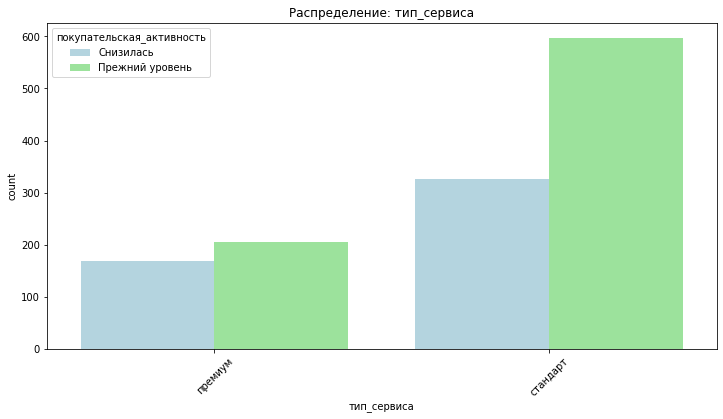

-----------------------------------------------------------
Распределение категориальной величины: разрешить_сообщать


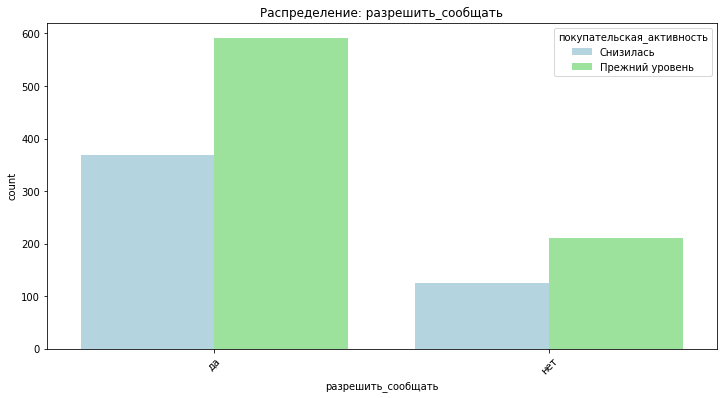

-----------------------------------------------------------
Распределение числовой величины: маркет_актив_6_мес


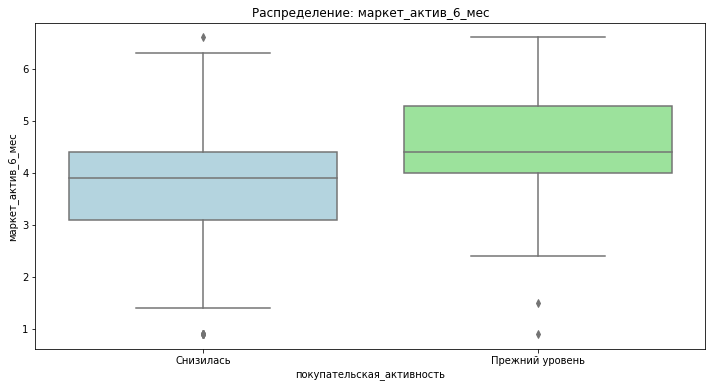

-----------------------------------------------------------
Распределение числовой величины: маркет_актив_тек_мес


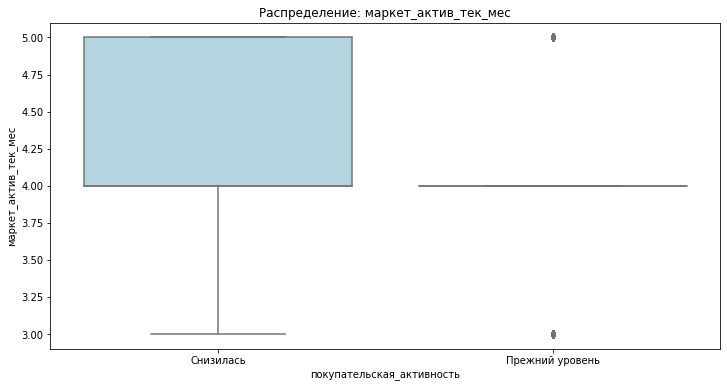

-----------------------------------------------------------
Распределение числовой величины: длительность


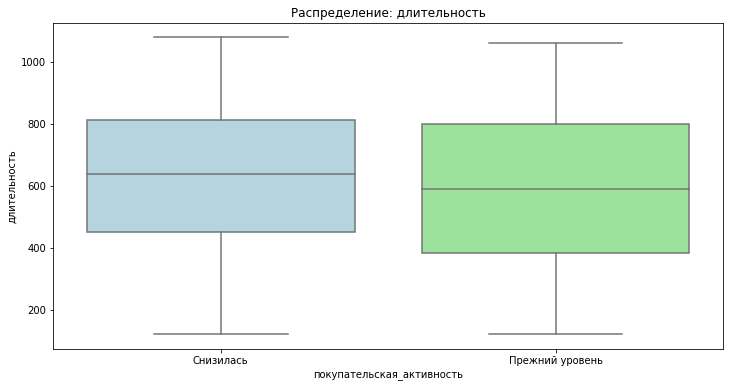

-----------------------------------------------------------
Распределение числовой величины: акционные_покупки


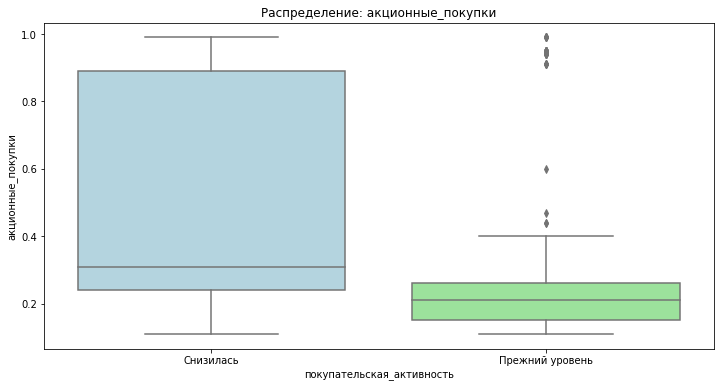

-----------------------------------------------------------
Распределение категориальной величины: популярная_категория


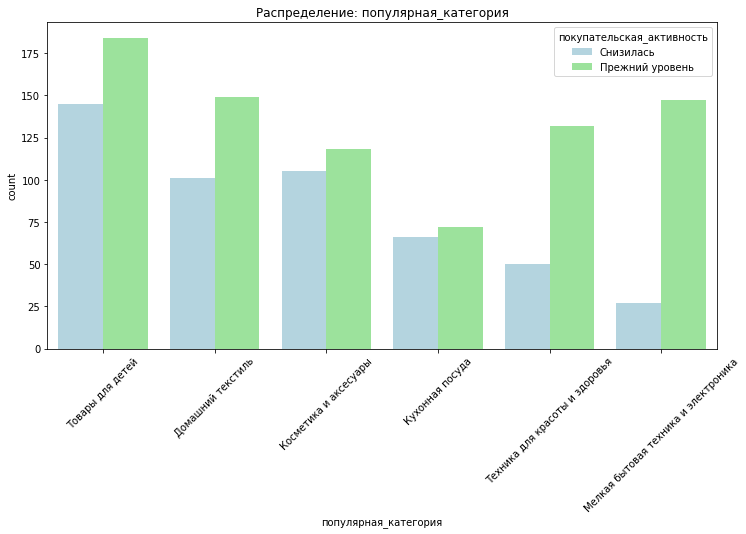

-----------------------------------------------------------
Распределение числовой величины: средний_просмотр_категорий_за_визит


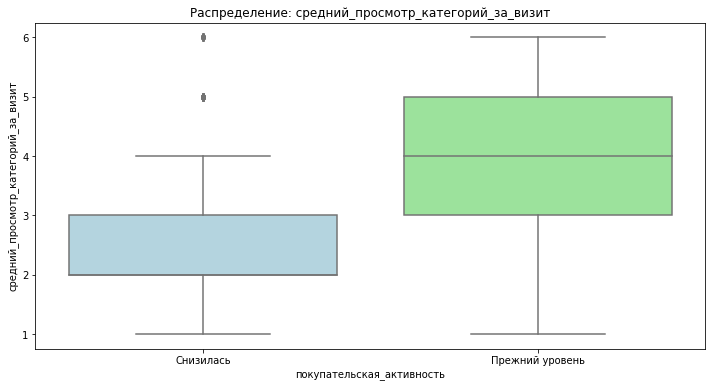

-----------------------------------------------------------
Распределение числовой величины: неоплаченные_продукты_штук_квартал


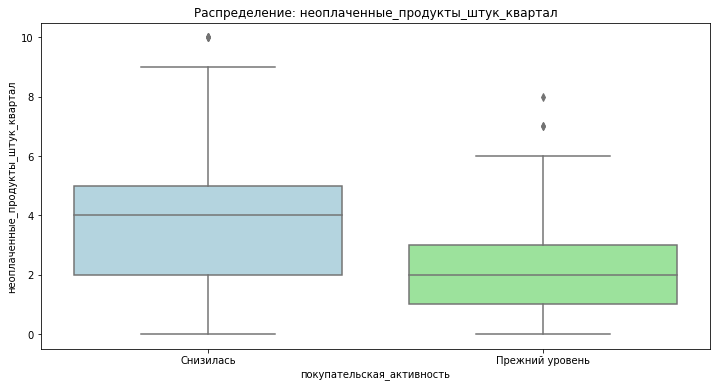

-----------------------------------------------------------
Распределение числовой величины: ошибка_сервиса


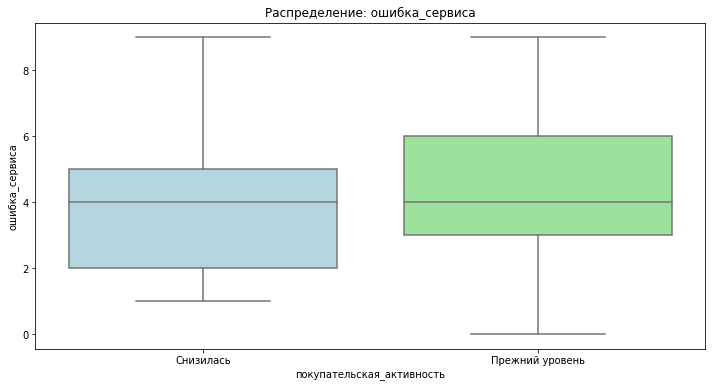

-----------------------------------------------------------
Распределение числовой величины: страниц_за_визит


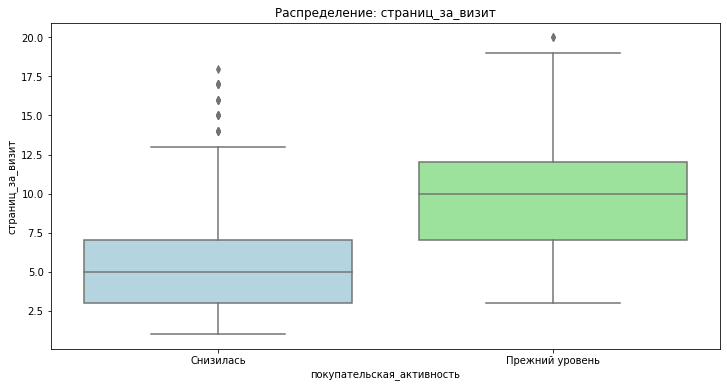

-----------------------------------------------------------
Распределение числовой величины: препредыдущий_месяц_выручка


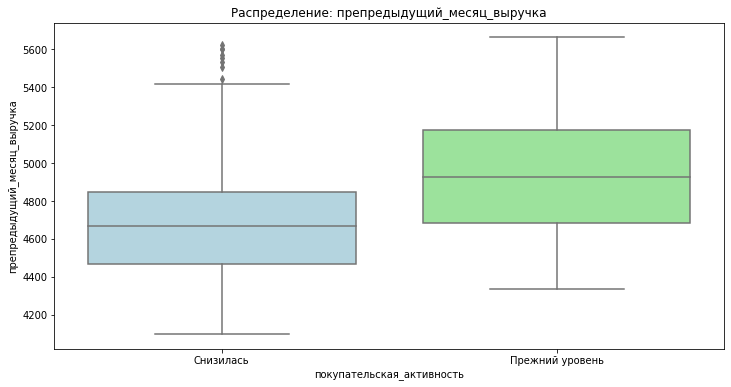

-----------------------------------------------------------
Распределение числовой величины: предыдущий_месяц_выручка


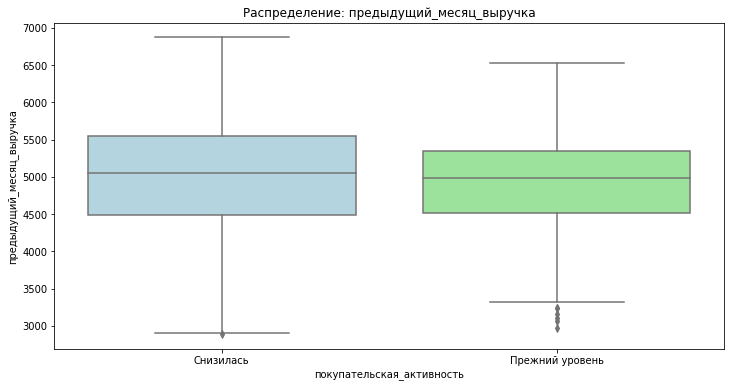

-----------------------------------------------------------
Распределение числовой величины: текущий_месяц_выручка


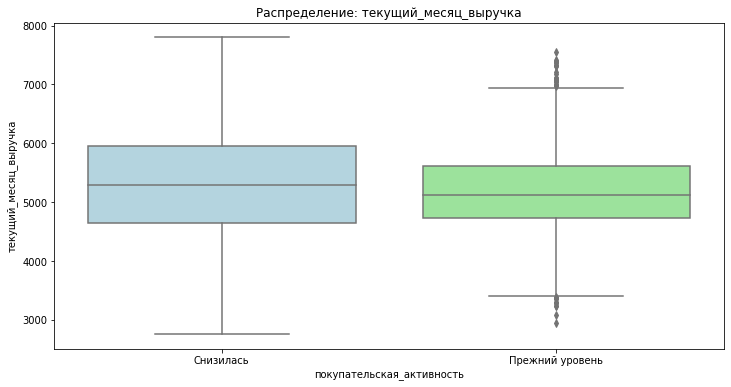

-----------------------------------------------------------
Распределение числовой величины: текущий_месяц_минут


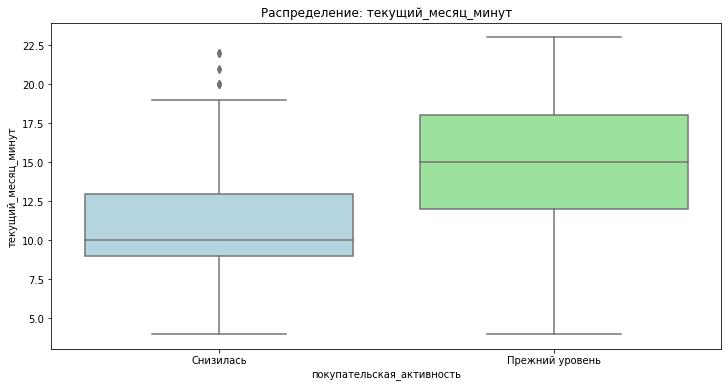

-----------------------------------------------------------
Распределение числовой величины: предыдущий_месяц_минут


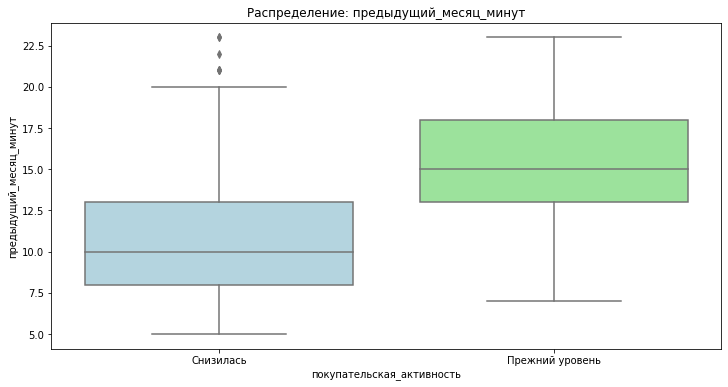

-----------------------------------------------------------
Распределение числовой величины: разница_пред_препред_месяц_выручка


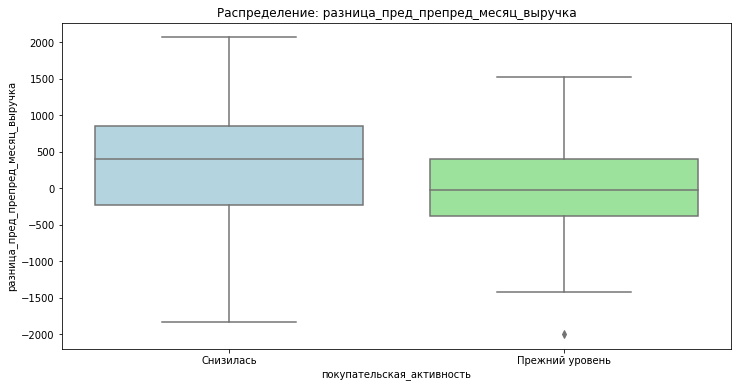

-----------------------------------------------------------
Распределение числовой величины: разница_тек_пред_месяц_выручка


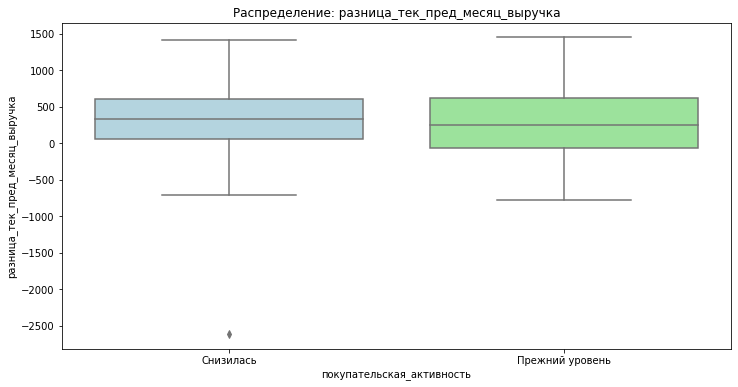

In [74]:
visualize_by_activity(df_market_file_merged, 'покупательская_активность')

**Вывод**

- Добавили 7 новых признаков(колонок) в датафрейм `df_market_file`:
    - `препредыдущий_месяц_выручка`
    - `предыдущий_месяц_выручка`
    - `текущий_месяц_выручка`
    - `текущий_месяц_минут`
    - `предыдущий_месяц_минут`
    - `разница_пред_препред_месяц_выручка`
    - `разница_тек_пред_месяц_выручка`
    
Таким образом мы объединили данные из трех таблиц:
 - `df_market_file`
 - `df_market_money`
 - `df_market_time`

**Профиль пользователя**:
Уходящий пользователь - будем называть пользователя, у которого снизилась покупательская активность.

Для уходящего пользователя характерно:
 - `тип_сервиса` - преобладает стандарт
 - `акционные_покупки` - покупок заметно больше чем у активного пользователя
 - Не интересуется мелкой бытовой техникой и электроникой а так же техникой для красоты и здоровья
 - `неоплаченные_продукты_штук_квартал` - больше чем у активного пользователя

Поведение на сайте:
 - `длительность` с момента регистрации сопоставима с активными пользователями
 - `страниц_за_визит` - меньше чем у активного пользователя
 - `средний_просмотр_категорий_за_визит` - меньше чем у активного пользователя
 - `разница_пред_препред_месяц_выручка` - большу чем у активного пользователя
 
По остальным признакам поведение сопоставимо с поведением активного пользователя.

## Шаг 5. Корреляционный анализ

interval columns not set, guessing: ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'текущий_месяц_минут', 'предыдущий_месяц_минут', 'разница_пред_препред_месяц_выручка', 'разница_тек_пред_месяц_выручка']


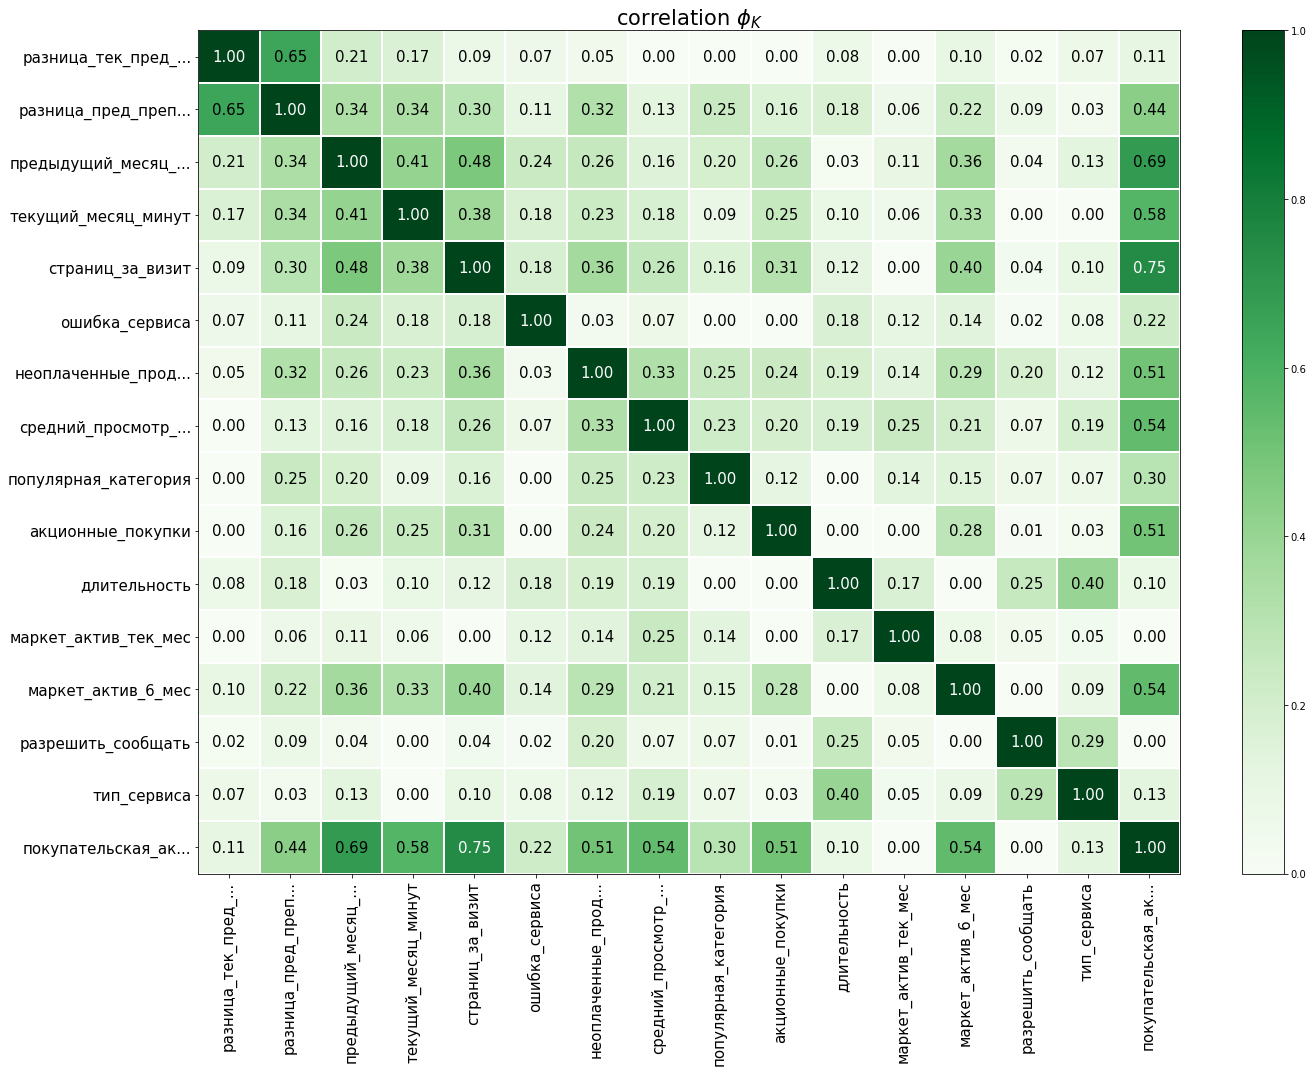

In [75]:
#  убираем признаки, которые не будем использовать в обучении
# 'id' - потому, что не влияет на целевой признак
# выручку по периодам потому, что на основе этих признаков мы рассчитали разницу -
# новые признаки имеют линейную зависимость
drop_features = [
    'id',
    'текущий_месяц_выручка',
    'предыдущий_месяц_выручка',
    'препредыдущий_месяц_выручка'
]

phik_overview = phik_matrix(df_market_file_merged.drop(columns=drop_features))

plot_correlation_matrix(
    phik_overview.values,
    x_labels=phik_overview.columns,
    y_labels=phik_overview.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$',
    fontsize_factor=1.5,
    figsize=(20, 15)
) 

Проверим вторым способом, вручную закодировав категориальные признаки

In [76]:
cat_features = [
    'покупательская_активность',
    'тип_сервиса',
    'разрешить_сообщать',
    'популярная_категория'
]

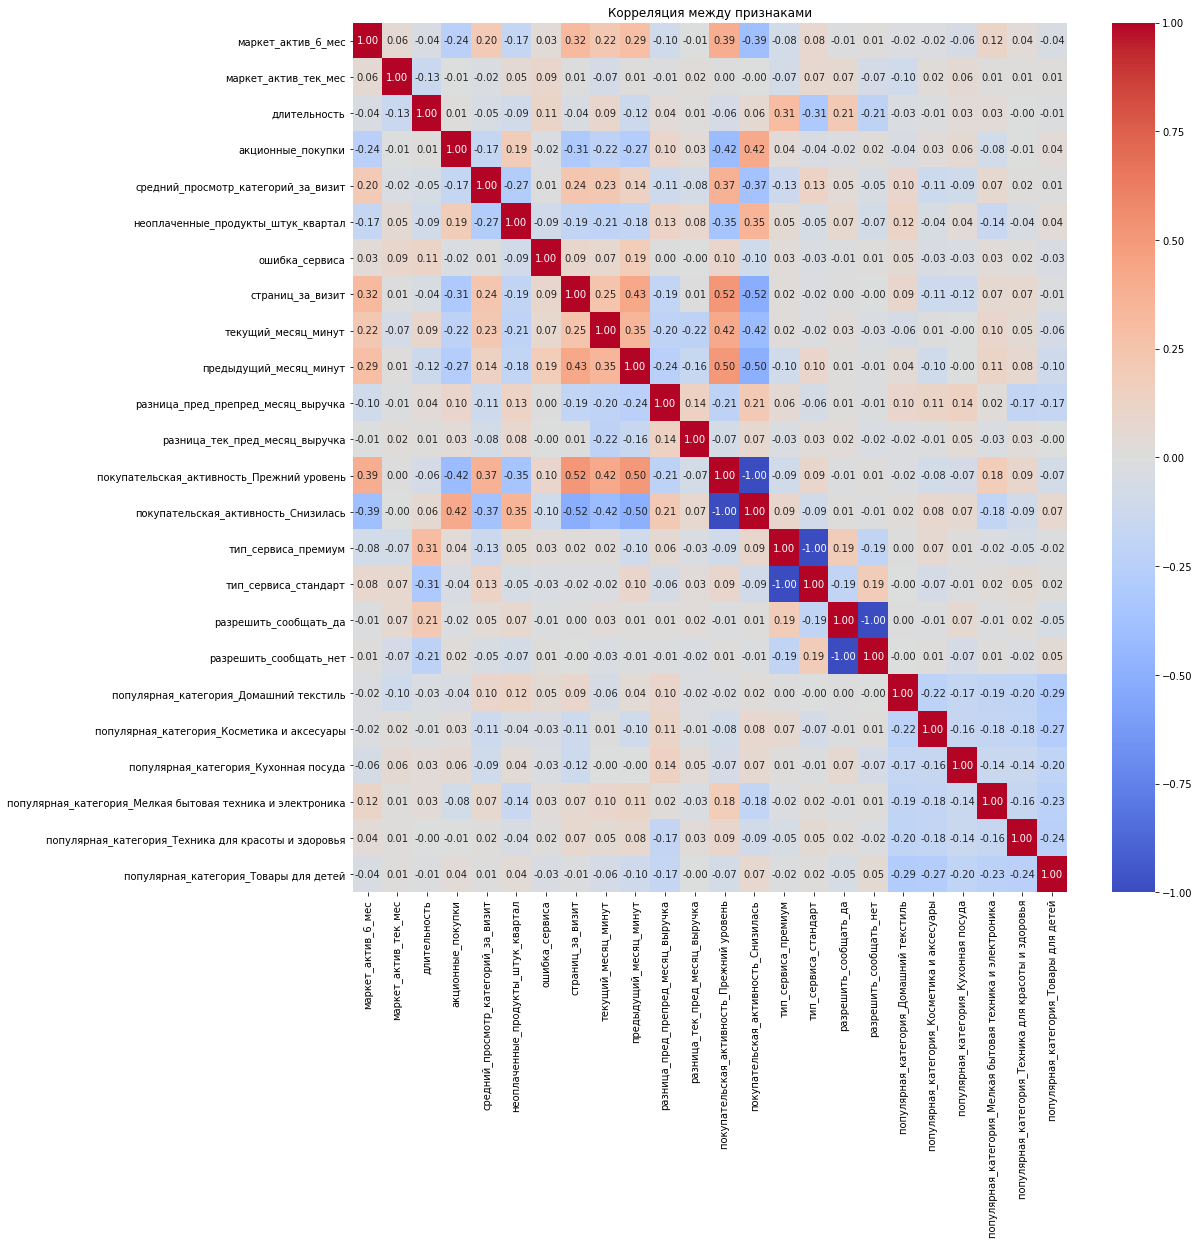

In [77]:
# для поиска корелляции между категориальными признаками закодируем их
data_encoded = pd.get_dummies(df_market_file_merged.drop(columns=drop_features), columns=cat_features)

corr = data_encoded.corr()

plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Корреляция между признаками")
plt.show()

**Вывод**

 - целевой признак 'покупательская_активность' зависит от 'страниц_за_визит' и 'предыдущий_месяц_минут', 'текущий_месяц_минут' - 0.75 (сильная), 0.69 (сильная), 0.58 (умеренная) корреляция соответственно (phik_overview)
 - в свою очередь 'страниц_за_визит' зависит от 'предыдущий_месяц_минут', 'текущий_месяц_минут' - 0.48 (умеренная), 0.38 (слабая) корреляция соответственно (phik_overview)
 - эмпирически кол-во страниц за визит и время за визит будут линейно зависимы, следовательно при обучении попробуем исключить один из признаков, например 'страниц_за_визит'

## Шаг 6. Использование пайплайнов

### 6.1 Подготовка данных - ColumnTransformer

 - Количественные и категориальные признаки обработайте в пайплайне раздельно.
 - Для кодирования категориальных признаков используйте как минимум два кодировщика.
 - Для масштабирования количественных — как минимум два скейлера.

In [78]:
df_market_file_merged.columns

Index(['id', 'покупательская_активность', 'тип_сервиса', 'разрешить_сообщать',
       'маркет_актив_6_мес', 'маркет_актив_тек_мес', 'длительность',
       'акционные_покупки', 'популярная_категория',
       'средний_просмотр_категорий_за_визит',
       'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса',
       'страниц_за_визит', 'препредыдущий_месяц_выручка',
       'предыдущий_месяц_выручка', 'текущий_месяц_выручка',
       'текущий_месяц_минут', 'предыдущий_месяц_минут',
       'разница_пред_препред_месяц_выручка', 'разница_тек_пред_месяц_выручка'],
      dtype='object')

In [79]:
drop_features

['id',
 'текущий_месяц_выручка',
 'предыдущий_месяц_выручка',
 'препредыдущий_месяц_выручка']

In [80]:
# на этапе корреляционного анализа установили, что признак имеет линейную зависимость с признаками,
# указывающими на кол-во времени, проведенного на сайте
# drop_features.append('страниц_за_визит')
# 
# Проверил - вот такие результаты:
#                 ('models', SVC(C=0.1, probability=True, random_state=42))])
# Метрика лучшей модели на тренировочной выборке: 0.902422082730302
# Метрика ROC-AUC на тестовой выборке: 0.9016754850088182
#
# Если признак оставить
#                 ('models', SVC(C=0.001, probability=True, random_state=42))])
# Метрика лучшей модели на тренировочной выборке: 0.9077511058550909
# Метрика ROC-AUC на тестовой выборке: 0.9070065736732403
#
# ВЫВОД: ОСТАВИМ ПРИЗНАК

In [81]:
target_feature = 'покупательская_активность'

ohe_columns = [
    'тип_сервиса',
    'разрешить_сообщать',
    'популярная_категория'
]

num_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'разница_пред_препред_месяц_выручка',
    'разница_тек_пред_месяц_выручка',
    'текущий_месяц_минут',
    'предыдущий_месяц_минут'
] 

In [82]:
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='error', sparse=False)
        )
    ]
)

In [83]:
# создаём общий пайплайн для подготовки данных
data_preprocessor = ColumnTransformer(
    [('ohe', ohe_pipe, ohe_columns),
     ('num', MinMaxScaler(), num_columns)
    ], 
    remainder='passthrough'
)

In [84]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final = Pipeline([
    ('preprocessor', data_preprocessor),
    ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
])

In [ ]:
# создаём словарь с гиперпараметрами для каждой модели
param_grid = [
    {
        'models': [KNeighborsClassifier()],
        # нечётные числа чтобы избежать ситуации, когда число соседей разных классов совпадает
        'models__n_neighbors': range(3, 17, 2),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [DecisionTreeClassifier(
            random_state=RANDOM_STATE,
        )],
        'models__max_depth': [3, 5, 7, 9, None],
        # ипользуем порции признаков (в долях)
        'models__max_features': [0.3, 0.5, 0.7, 'sqrt', 'log2'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough'] 
    },
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear'
        )],
        'models__penalty': ['l1', 'l2'],
        # логарифмическая шкала
        'models__C': [0.01, 0.1, 1, 10],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVC(
            random_state=RANDOM_STATE,
            # вычисляет вероятности - для корректной работы predict_proba()
            probability=True
        )],
        # логарифмическая шкала
        'models__C': [0.001, 0.01, 0.1, 1],
#         'models__kernel': ['linear', 'rbf'], ## долгие вычисления
#         'models__gamma': ['scale', 'auto'], ## долгие вычисления
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), PolynomialFeatures(), 'passthrough']
    }
]

### 6.2 Обучение моделей - KNeighborsClassifier(), DecisionTreeClassifier(), LogisticRegression(), SVC()

In [86]:
drop_features.append(target_feature)

X_train, X_test, y_train, y_test = train_test_split(
    df_market_file_merged.drop(drop_features, axis=1),
    df_market_file_merged[target_feature],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((972, 15), (324, 15), (972,), (324,))

In [87]:
grid = GridSearchCV(
    pipe_final, 
    param_grid=param_grid, 
    cv=5, 
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         Pipeline(steps=[('simpleImputer_ohe',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('ohe',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        sparse=False))]),
                                                                         ['тип_сервиса',
                                                                          'разрешить_сообщать

### 6.3 Выберите лучшую модель, используя заданную метрику.

Стратегия:
 - ❌ ~~использовать пайплайны и инструменты подбора гиперпараметров для каждой модели отдельно, чтобы выбрать лучшую модель самостоятельно~~;
 - ✅ использовать один общий пайплайн для всех моделей и инструмент подбора гиперпараметров, который вернёт вам лучшую модель.

In [88]:
print('Лучшая модель и её параметры:\n\n', grid.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', grid.best_score_)

# проверим работу модели на тестовой выборке
y_test_pred = grid.predict_proba(X_test)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('num', StandardScaler(),
                                                  ['маркет_акт

**Вывод**

 - Провели тестирование четырех моделей:
     - KNeighborsClassifier(),
     - DecisionTreeClassifier(),
     - LogisticRegression(),
     - SVC()
 - Для каждой модели тестировали разные наборы гиперпараметров используя GridSearchCV (осуществляет перебор по сетке, все указанные значения гиперпараметров будут перебираться): 
     - cv=5 - 5 этапов кросс-валидации (5 итераций обучения и валидации на разных выборках)
     - scoring='roc_auc' - оптимальаня метрика для сравнения результатов бинарной классификации - площадь фигуры под графиком
 - В качестве лучшей модели выбираем SVC() с гиперпараметрами C=0.001, probability=True, random_state=42.

1.  В задаче классификации при обследовании данных наблюдаем дисбаланс классов: 802 активных клиентов и 494 уходящих клиентов.

2. В исходной формулировке нет задачи отдать приоритет какому-либо классу.

3. Поэтому для общей оценки качества решения выбираб метрику roc_auc

## Шаг 7. Анализ важности признаков

Оценим важность признаков для лучшей модели и построим график важности с помощью метода SHAP.

> для текущей версии scikit-learn: 0.24.1 нам необходим список признаков после обработки ColumnTransformer. Для получения такого списка будем использовать workaround - соберем новый preprocessor и обучим модель с конфигурацией как из выводов выше. В preprocossor будут именованные свойства, которые позволят обратиться к категориям ohe признаков

In [89]:
preprocessor = ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать',
                                                   'популярная_категория']),
                                                 ('num', StandardScaler(),
                                                  ['маркет_актив_6_мес',
                                                   'маркет_актив_тек_мес',
                                                   'длительность',
                                                   'акционные_покупки',
                                                   'средний_просмотр_категорий_за_визит',
                                                   'неоплаченные_продукты_штук_квартал',
                                                   'ошибка_сервиса',
                                                   'страниц_за_визит',
                                                   'разница_пред_препред_месяц_выручка',
                                                   'разница_тек_пред_месяц_выручка',
                                                   'текущий_месяц_минут',
                                                   'предыдущий_месяц_минут'])])

In [90]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed  = preprocessor.transform(X_test)

In [91]:
model = SVC(
    C=0.001,
    probability=True,
    random_state=RANDOM_STATE
)

In [92]:
model.fit(X_train_preprocessed, y_train)

SVC(C=0.001, probability=True, random_state=42)

In [93]:
# [:,1] - вероятность класса - покупательская активность снизилась 
y_test_pred = model.predict_proba(X_test_preprocessed)[:,1]
print(f'Метрика ROC-AUC на тестовой выборке: {roc_auc_score(y_test, y_test_pred)}')

Метрика ROC-AUC на тестовой выборке: 0.9070065736732403


In [94]:
# формируем список признаков после data процессинга
ohe_processor = preprocessor.named_transformers_['ohe']
ohe           = ohe_processor.named_steps['ohe']

ohe_features = []
for i, col in enumerate(ohe_columns):
    categories = ohe.categories_[i]
    # drop_first
    for cat in categories[1:]:
        ohe_features.append(f"{col}_{cat}")

numeric_features = num_columns
feature_names    = ohe_features + numeric_features

feature_names

['тип_сервиса_стандарт',
 'разрешить_сообщать_нет',
 'популярная_категория_Косметика и аксесуары',
 'популярная_категория_Кухонная посуда',
 'популярная_категория_Мелкая бытовая техника и электроника',
 'популярная_категория_Техника для красоты и здоровья',
 'популярная_категория_Товары для детей',
 'маркет_актив_6_мес',
 'маркет_актив_тек_мес',
 'длительность',
 'акционные_покупки',
 'средний_просмотр_категорий_за_визит',
 'неоплаченные_продукты_штук_квартал',
 'ошибка_сервиса',
 'страниц_за_визит',
 'разница_пред_препред_месяц_выручка',
 'разница_тек_пред_месяц_выручка',
 'текущий_месяц_минут',
 'предыдущий_месяц_минут']

In [95]:
feature_names_short = {}
x = 0

for feature in feature_names:
    feature_names_short[feature] = f'x_{x}'
    x += 1
    
feature_names_short

{'тип_сервиса_стандарт': 'x_0',
 'разрешить_сообщать_нет': 'x_1',
 'популярная_категория_Косметика и аксесуары': 'x_2',
 'популярная_категория_Кухонная посуда': 'x_3',
 'популярная_категория_Мелкая бытовая техника и электроника': 'x_4',
 'популярная_категория_Техника для красоты и здоровья': 'x_5',
 'популярная_категория_Товары для детей': 'x_6',
 'маркет_актив_6_мес': 'x_7',
 'маркет_актив_тек_мес': 'x_8',
 'длительность': 'x_9',
 'акционные_покупки': 'x_10',
 'средний_просмотр_категорий_за_визит': 'x_11',
 'неоплаченные_продукты_штук_квартал': 'x_12',
 'ошибка_сервиса': 'x_13',
 'страниц_за_визит': 'x_14',
 'разница_пред_препред_месяц_выручка': 'x_15',
 'разница_тек_пред_месяц_выручка': 'x_16',
 'текущий_месяц_минут': 'x_17',
 'предыдущий_месяц_минут': 'x_18'}

In [96]:
# запускаем SHAP-анализ
# сначала на трениировочных данных
explainer = shap.Explainer(
    model.predict_proba, 
    X_train_preprocessed[:100],
    algorithm='auto'
)
shap_values = explainer(X_train_preprocessed[:100])

PermutationExplainer explainer: 101it [02:43,  1.68s/it]                         


In [97]:
# shap.summary_plot(
#     shap_values[:,:,1], 
#     X_train_preprocessed[:100],
#     feature_names=list(feature_names_short.values()),
#     plot_size=(16, 10)
# )

/tmp/ipykernel_157/2600230618.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


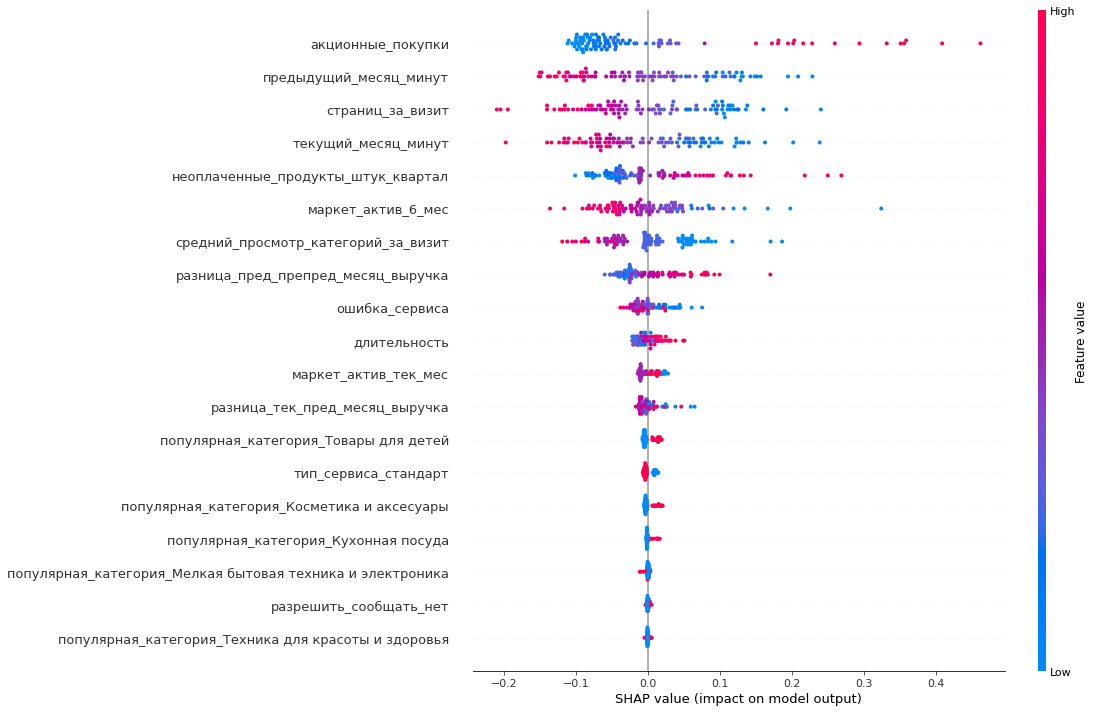

In [98]:
# меняем .values() на .keys()
shap.summary_plot(
    shap_values[:,:,1], 
    X_train_preprocessed[:100],
    feature_names=list(feature_names_short.keys()),
    plot_size=(16, 10)
)

/tmp/ipykernel_157/620487659.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


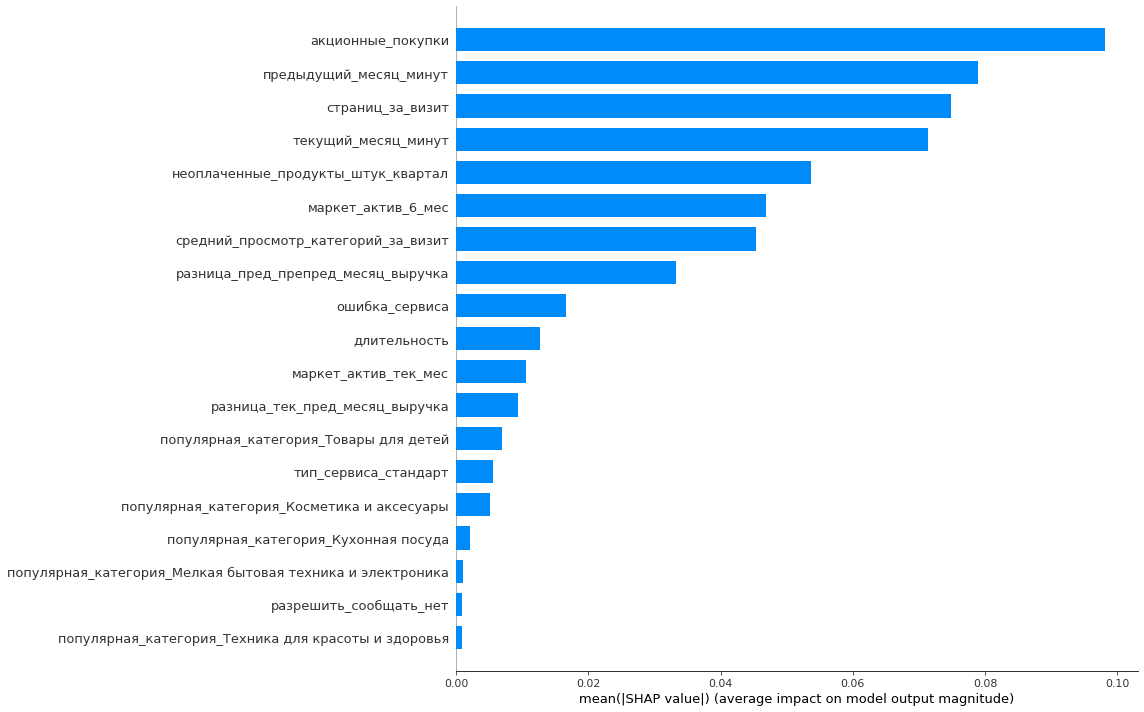

In [99]:
# добавил plot_type='bar'
shap.summary_plot(
    shap_values[:,:,1], 
    X_train_preprocessed[:100],
    feature_names=list(feature_names_short.keys()),
    plot_size=(16, 10),
    plot_type='bar'
)

In [100]:
# запускаем SHAP-анализ
# теперь на тестовых данных
explainer = shap.Explainer(
    model.predict_proba, 
    X_test_preprocessed[:100],
    algorithm='auto'
)
shap_values = explainer(X_test_preprocessed[:100])

PermutationExplainer explainer: 101it [02:34,  1.64s/it]                         


In [101]:
# shap.summary_plot(
#     shap_values[:,:,1], 
#     X_test_preprocessed[:100],
#     feature_names=list(feature_names_short.values()),
#     plot_size=(16, 10)
# )

/tmp/ipykernel_157/768598013.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


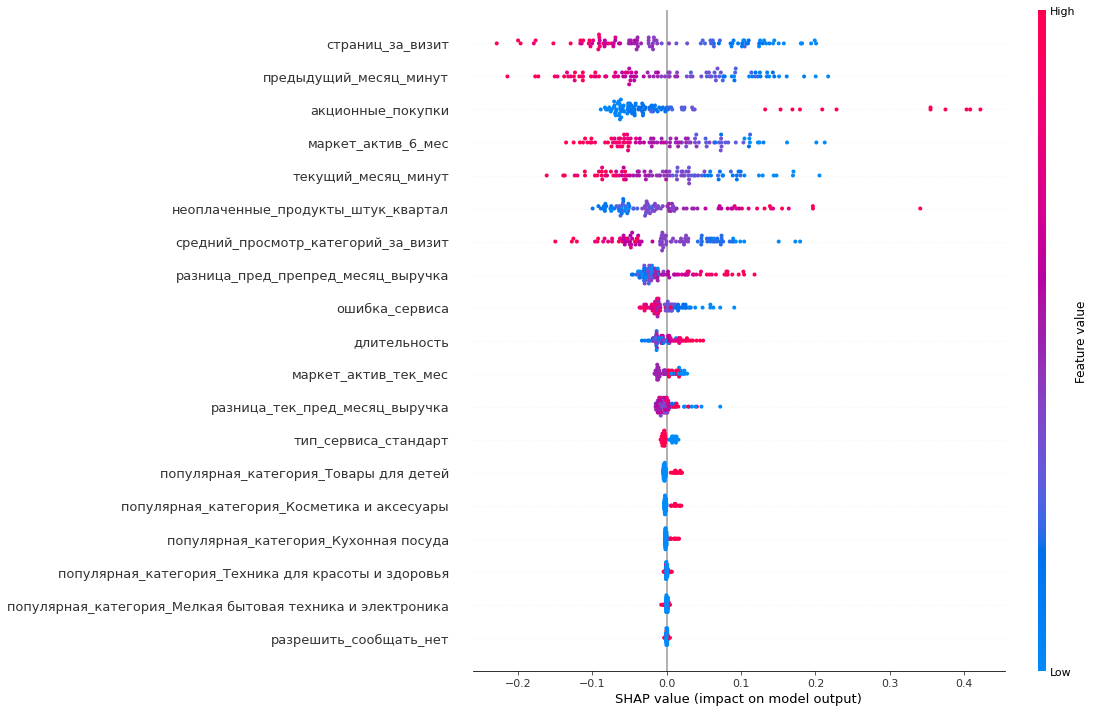

In [102]:
# меняем .values() на .keys()
shap.summary_plot(
    shap_values[:,:,1], 
    X_test_preprocessed[:100],
    feature_names=list(feature_names_short.keys()),
    plot_size=(16, 10)
)

/tmp/ipykernel_157/1456775818.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


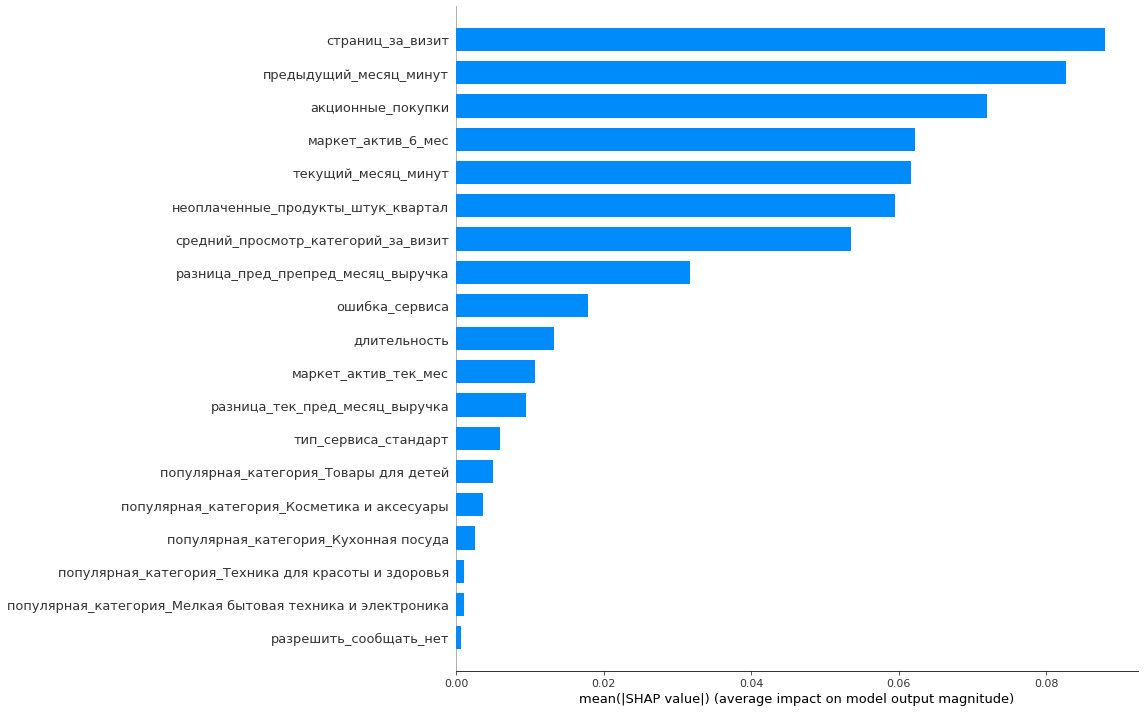

In [103]:
# добавил plot_type='bar'
shap.summary_plot(
    shap_values[:,:,1], 
    X_test_preprocessed[:100],
    feature_names=list(feature_names_short.keys()),
    plot_size=(16, 10),
    plot_type='bar'
)

Я провел анализ на тренировочных данных и тестовых, распредение несколько отличается, но группы признаков (по 3 признака в группе) сохраняют свой порядок. Считаем что модель стабильна.

**Выводы**

 - Точки справа - Признак **увеличивает** вероятность снижения активности
 - Точки слева - Признак **уменьшает** вероятность снижения активности
 - Красные точки - Высокие значения признака
 - Синие точки - Низкие значения признака
 - Точки на линии 0.0 — признак не влияет на прогноз для данного наблюдения

Топ 5 признаков которые влияют на активность пользователя (по убыванию):
 - `акционные_покупки`: `x_10`
 - `предыдущий_месяц_минут`: `x_18`
 - `страниц_за_визит`: `x_14`
 - `текущий_месяц_минут`: `x_17`
 - `неоплаченные_продукты_штук_квартал`: `x_12`


Признаки которые меньше всего влияют на активность пользователя (по убыванию значимости):

 - `популярная_категория_Товары для детей`: `x_6`
 - `тип_сервиса_стандарт`: `x_0`
 - `популярная_категория_Косметика и аксесуары`: `x_2`
 - `популярная_категория_Кухонная посуда`: `x_3`,
 - `популярная_категория_Мелкая бытовая техника и электроника`: `x_4`,
 - `разрешить_сообщать_нет`: `x_1`


Рассмотрим топ-5 признаков:

1. `акционные_покупки` - среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.

Низкое значение признака, говорит о высокой вероятности сохранения активности.
Распределение по шкале говорит о наличие нелинейной зависимости.
Отсутствие точек в нуле - признак однозначно влияет на активность покупателя.

Скорее всего такое поведение связано с тем, что пользователи регистрируются ради акционных товаров - разово.

2. `предыдущий_месяц_минут` - время (в минутах), которое покупатель провёл на сайте в течение периода.

Чем больше покупатель провел времени на сайте, тем меньше вероятность снижения активности, и наоборот - справедливо.

3. `страниц_за_визит` - среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.

Чем больше покупатель посмотрел страниц на сайте, тем меньше вероятность снижения активности, и наоборот - справедливо.

4. `текущий_месяц_минут` - аналогично `предыдущий_месяц_минут`.

5. `неоплаченные_продукты_штук_квартал` - общее число неоплаченных товаров в корзине за последние 3 месяца.

Низкое значение признака, говорит о высокой вероятности сохранения активности. Чем больше неоплаченных товаров, тем выше вероятноть снижения активности.

Продолжим с остальными признаками, которые имеют меньшее значение.

 - `маркет_актив_6_мес` **зона роста** - среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
 
Высокие значения - повышают вероятность сохранения прежней активности.

 - `средний_просмотр_категорий_за_визит`

Вероятно зависит от других признаков, средние значения почти не влияют на покупательскую активности, низкие справедливо снижают активность, высокие - повышают.

 - `разница_пред_препред_месяц_выручка`
 
Чем меньше разница, тем выше вероятность сохранения активности и наоборот.

 - `ошибка_сервиса`
 
Зависимость прямопропорциональна, это говорит о том, что ошибки это не причина поведения пользователя, а следствие.

 - `длительность` **зона роста** - значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
 
Чем больше времени прошло с момент регистрации, тем выше вероятность снижения - активности.

 - `маркет_актив_тек_мес` - тенденции сохраняются как и для `маркет_актив_6_мес`, однако значение признака ниже.
 
 - `разница_тек_пред_месяц_выручка`- значения в равной степени влияют на целевой признак

___
**Что необходимо учитывать при принятии решений**:

 - **Кол-во акционных покупок - повышать, для привлечения новых клиентов.**
 - **Время проведенное на сайте - повышать, удерживать клиентов.**
 - **Время с момента регистрации - удерживать новых клиентов, особенно тех кто пришел за акционными товарами.**
 - **Кол-во неоплаченных товаров в корзине - снижать.**
 - **Кол-во маркетинговых коммуникаций - повышать/сохранить на прежнем уровне.**

## Шаг 8. Сегментация покупателей

In [104]:
X              = df_market_file_merged.drop(drop_features, axis=1)
X_preprocessed = preprocessor.transform(X)
proba          = model.predict_proba(X_preprocessed)[:,1]

In [105]:
proba

array([0.9891815 , 0.59464672, 0.94955039, ..., 0.08249674, 0.11901295,
       0.82697841])

In [106]:
df_results = pd.DataFrame({
    'id': df_market_file_merged['id'],
    'probability_client_left': proba
})

In [107]:
df_results.head(5)

,id,probability_client_left
0,215349,0.989181
1,215350,0.594647
2,215351,0.949550
3,215352,0.985524
4,215353,0.896105


In [108]:
df_results = df_results.merge(df_money, on='id')

df_results

,id,probability_client_left,прибыль
0,215349,0.989181,4.16
1,215350,0.594647,3.13
2,215351,0.949550,4.87
3,215352,0.985524,4.21
4,215353,0.896105,3.95
...,...,...,...
1291,216643,0.222422,4.44
1292,216644,0.049180,6.11
1293,216645,0.082497,3.29
1294,216646,0.119013,4.03


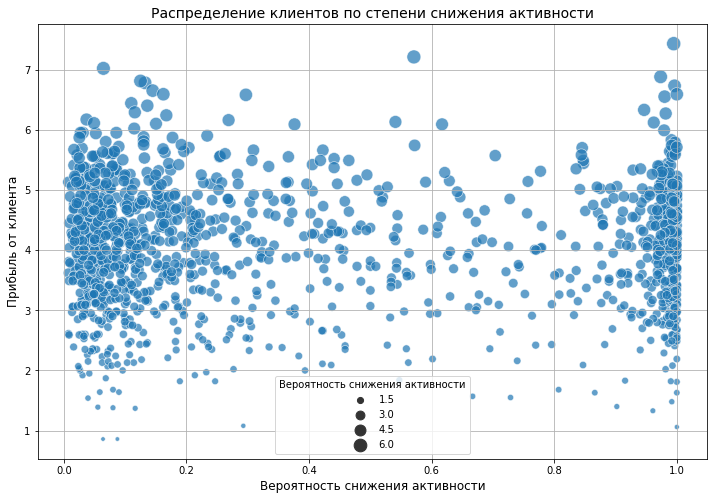

In [109]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_results,
    x='probability_client_left',
    y='прибыль',
    alpha=0.7,
    size='прибыль',
    sizes=(20, 200)
)

plt.title('Распределение клиентов по степени снижения активности', fontsize=14)
plt.xlabel('Вероятность снижения активности', fontsize=12)
plt.ylabel('Прибыль от клиента', fontsize=12)
plt.legend(title='Вероятность снижения активности')
plt.grid(True)
plt.show()

Можно сформировать три кластера в двух размерностях:
 - высокая прибыльность
 - средняя прибыльность
 - низкая прибыльность
 - высокий риск
 - средний риск
 - низкий риск

<AxesSubplot:>

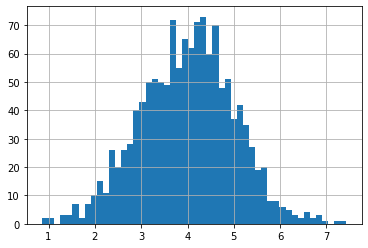

In [110]:
# проверим распределение
df_results['прибыль'].hist(bins=50)

<AxesSubplot:>

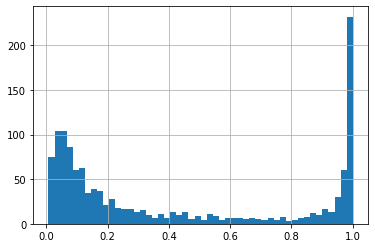

In [111]:
# проверим распределение
df_results['probability_client_left'].hist(bins=50)

С точки зрения бизнеса рационально выделить наиболее прибыльных клиентов, разделим на три группы:
 - прибыльные
 - стабильные
 - остальные

С точки зрения прогнозов тоже выделим три группы:
 - высокий риск
 - средний риск
 - низкий риск

In [112]:
# определим граничные значения для групп пользователей
profit_33 = df_results['прибыль'].quantile(0.33)
profit_66 = df_results['прибыль'].quantile(0.66)

# добавим колонку с признаком
df_results['profit_class'] = np.where(
    df_results['прибыль'] >= profit_66, 'прибыльные',
    np.where(
        df_results['прибыль'] >= profit_33, 'стабильные',
        'остальные'
    )
)

df_results.head(5)

,id,probability_client_left,прибыль,profit_class
0,215349,0.989181,4.16,стабильные
1,215350,0.594647,3.13,остальные
2,215351,0.949550,4.87,прибыльные
3,215352,0.985524,4.21,стабильные
4,215353,0.896105,3.95,стабильные


In [113]:
# определим граничные значения для риска
risk_low  = 0.33
risk_high = 0.66

df_results['risk_class'] = np.where(
    df_results['probability_client_left'] >= risk_high, 'Высокий риск',
    np.where(
        df_results['probability_client_left'] <= risk_low, 'Низкий риск',
        'Средний риск'
    )
)
                   
df_results.head(5)

,id,probability_client_left,прибыль,profit_class,risk_class
0,215349,0.989181,4.16,стабильные,Высокий риск
1,215350,0.594647,3.13,остальные,Средний риск
2,215351,0.949550,4.87,прибыльные,Высокий риск
3,215352,0.985524,4.21,стабильные,Высокий риск
4,215353,0.896105,3.95,стабильные,Высокий риск


> Выберем группу **прибыльных** клиентов с **высоким риском** снижения клиентской активности как наиболее критичную для бизнеса. А так же группу **прибыльных** клиентов с **низким риском**. Нам следует определить признаки в которых сегменты отличаются. 

> Добавил ещё группу **стабильных** клиентов с **низким** риском.


In [114]:
rows = (df_results['profit_class'] == 'прибыльные') & (df_results['risk_class'] == 'Высокий риск')
df_improve_clients = df_results[rows]

df_improve_clients.shape

(144, 5)

In [115]:
# проверим уникальность id
df_improve_clients['id'].nunique()

144

In [116]:
rows = (df_results['profit_class'] == 'прибыльные') & (df_results['risk_class'] == 'Низкий риск')
df_reference_clients = df_results[rows]

df_reference_clients.shape

(256, 5)

In [117]:
# проверим уникальность id
df_reference_clients['id'].nunique()

256

In [118]:
rows = (df_results['profit_class'] == 'стабильные') & (df_results['risk_class'] == 'Низкий риск')
df_normal_clients = df_results[rows]

df_normal_clients.shape

(235, 5)

In [119]:
# проверим уникальность id
df_normal_clients['id'].nunique()

235

> В группу для `улучшения` попадают 144 клиента.
В группу, с которой будем брать пример, попадают 256 клиентов. Дополнительно рассмотрим группу стабильных клиентов с низким риском.

> Рассмотрим их характеристики подробнее.

In [120]:
improve_clients_ids    = df_improve_clients['id'].unique()
reference_clients_ids  = df_reference_clients['id'].unique()
normal_clients_ids     = df_normal_clients['id'].unique()

improve_clients_data   = df_market_file_merged[df_market_file_merged['id'].isin(improve_clients_ids )]
reference_clients_data = df_market_file_merged[df_market_file_merged['id'].isin(reference_clients_ids)]
normal_clients_data    = df_market_file_merged[df_market_file_merged['id'].isin(normal_clients_ids)]

improve_clients_data.shape, reference_clients_data.shape, normal_clients_data.shape

((144, 20), (256, 20), (235, 20))

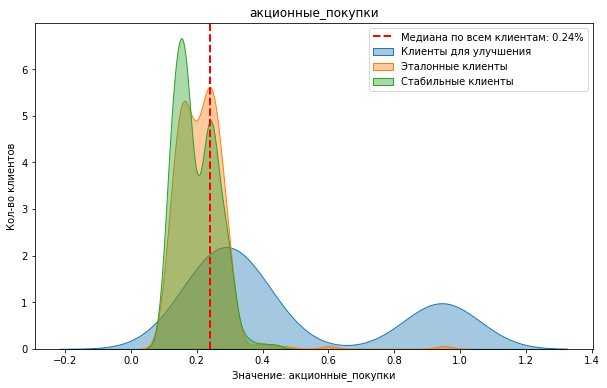

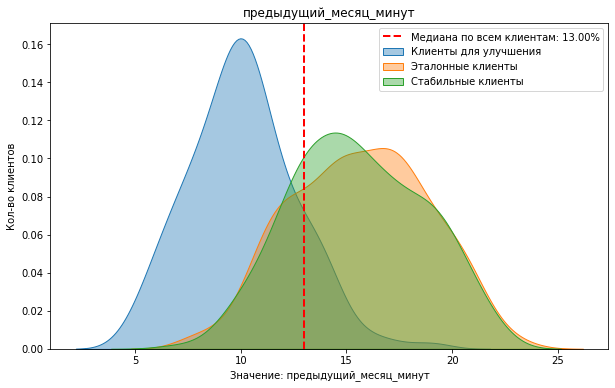

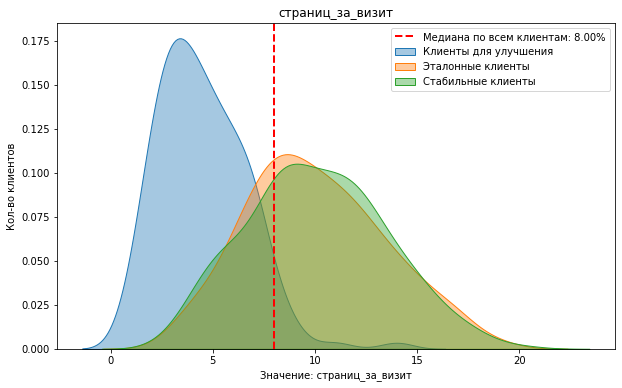

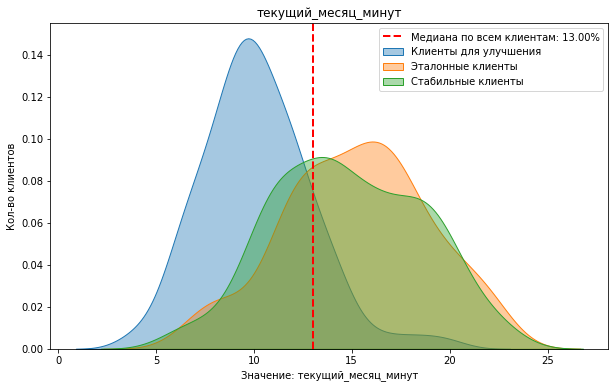

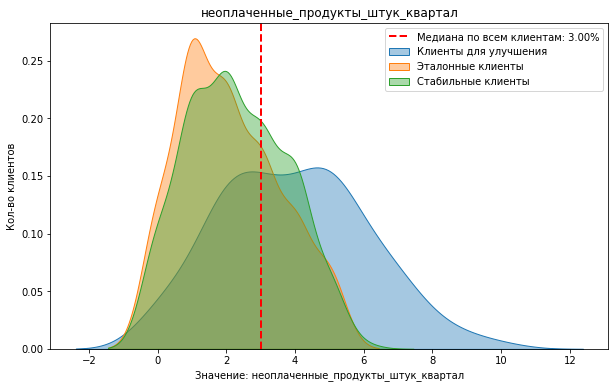

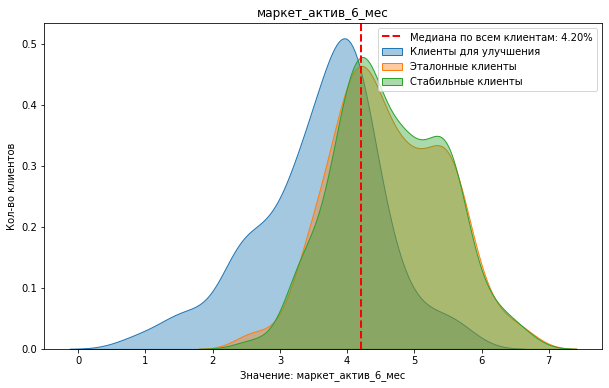

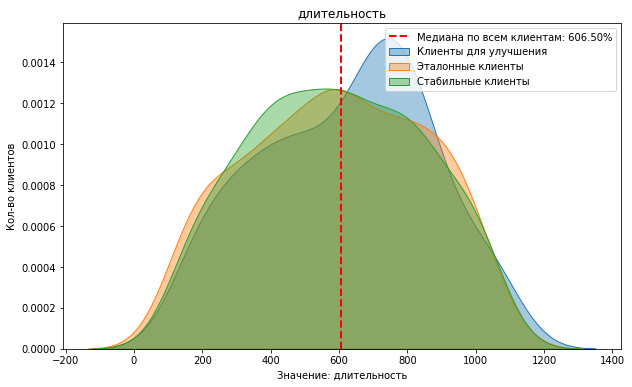

In [121]:
feature_list = [
    'акционные_покупки',
    'предыдущий_месяц_минут',
    'страниц_за_визит',
    'текущий_месяц_минут',
    'неоплаченные_продукты_штук_квартал',
    'маркет_актив_6_мес',
    'длительность'
]

for feature in feature_list:
    
    median = df_market_file_merged[feature].median()
    
    plt.figure(figsize=(10, 6))
    sns.kdeplot(improve_clients_data[feature], label='Клиенты для улучшения', fill=True, alpha=0.4)
    sns.kdeplot(reference_clients_data[feature], label='Эталонные клиенты', fill=True, alpha=0.4)
    sns.kdeplot(normal_clients_data[feature], label='Стабильные клиенты', fill=True, alpha=0.4)
    plt.axvline(
        x=median, 
        color='red', 
        linestyle='--', 
        linewidth=2,
        label=f'Медиана по всем клиентам: {median:.2f}%'
    )
    plt.xlabel(f'Значение: {feature}')
    plt.ylabel(f'Кол-во клиентов')
    plt.title(feature)
    plt.legend()
    plt.show()

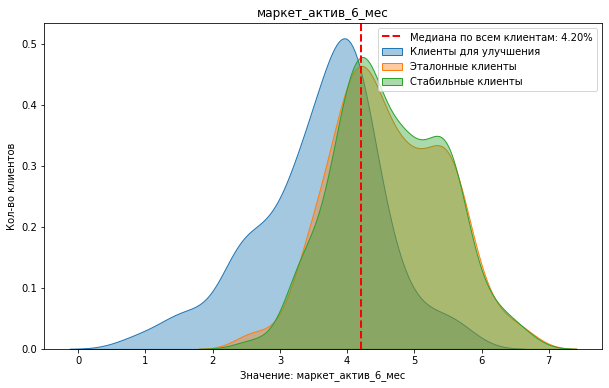

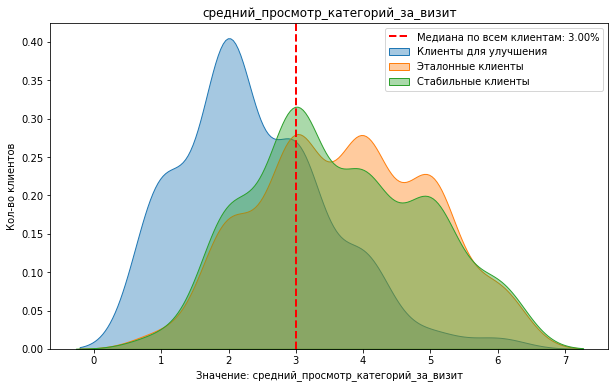

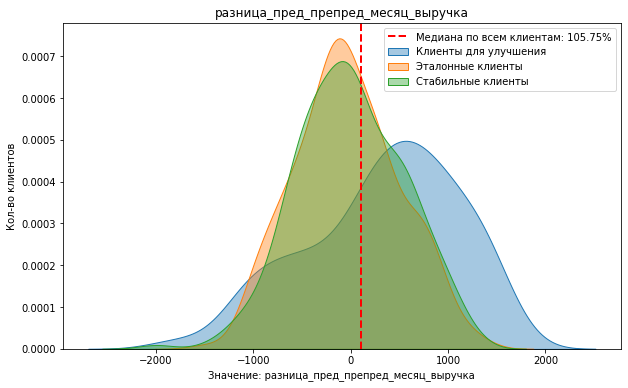

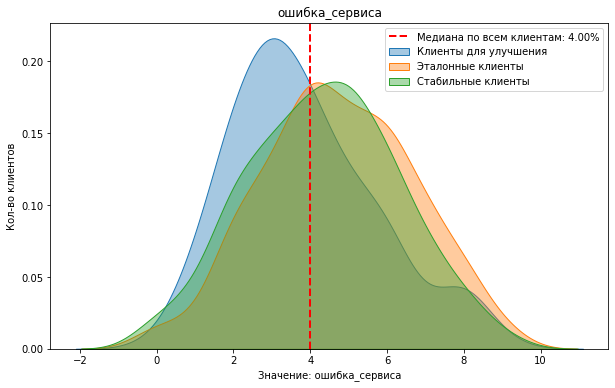

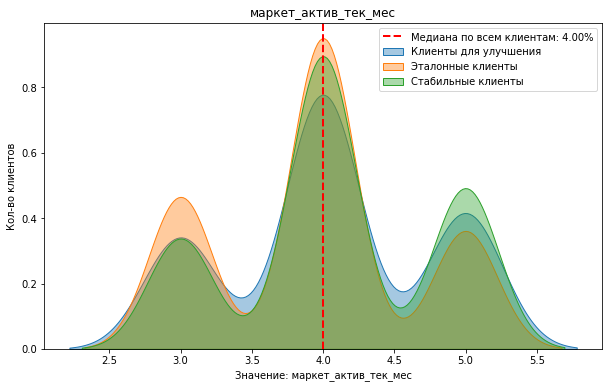

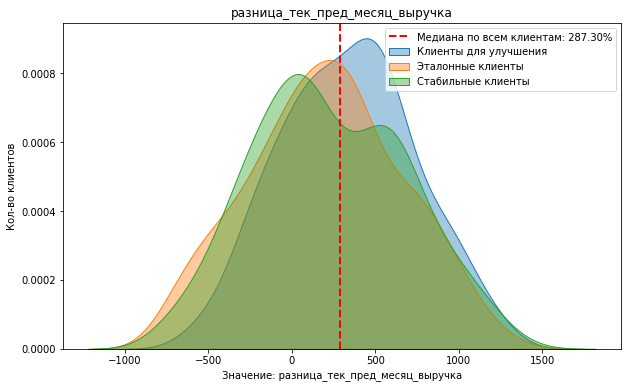

In [122]:
# дополнительно смотрим
feature_list = [
    'маркет_актив_6_мес',
    'средний_просмотр_категорий_за_визит',
    'разница_пред_препред_месяц_выручка',
    'ошибка_сервиса',
    'маркет_актив_тек_мес',
    'разница_тек_пред_месяц_выручка',
]

for feature in feature_list:
    
    median = df_market_file_merged[feature].median()
    
    plt.figure(figsize=(10, 6))
    sns.kdeplot(improve_clients_data[feature], label='Клиенты для улучшения', fill=True, alpha=0.4)
    sns.kdeplot(reference_clients_data[feature], label='Эталонные клиенты', fill=True, alpha=0.4)
    sns.kdeplot(normal_clients_data[feature], label='Стабильные клиенты', fill=True, alpha=0.4)
    plt.axvline(
        x=median, 
        color='red', 
        linestyle='--', 
        linewidth=2,
        label=f'Медиана по всем клиентам: {median:.2f}%'
    )
    plt.xlabel(f'Значение: {feature}')
    plt.ylabel(f'Кол-во клиентов')
    plt.title(feature)
    plt.legend()
    plt.show()

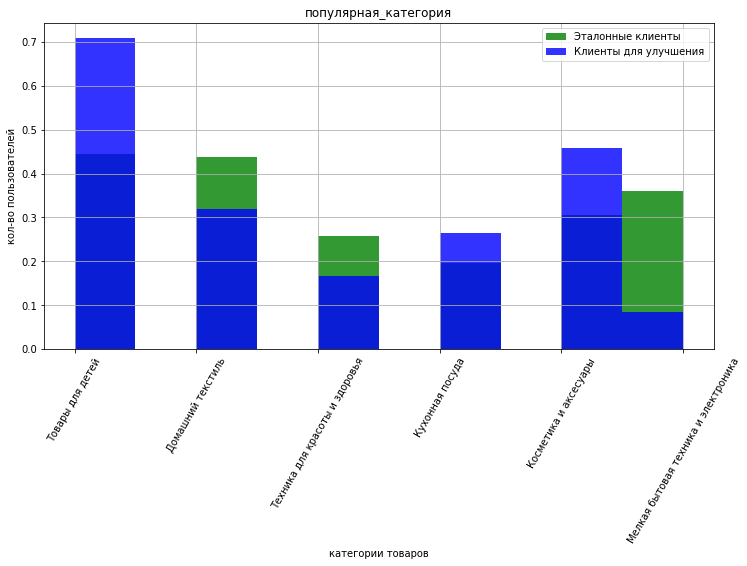

In [123]:
# смотрим самые популярные товары уходящих прибыльных клиентов
plt.figure(figsize=(12, 6))
reference_clients_data['популярная_категория'].hist(
    alpha=0.8,
    label='Эталонные клиенты',
    color='green',
    density=True
)
improve_clients_data['популярная_категория'].hist(
    alpha=0.8,
    label='Клиенты для улучшения',
    color='blue',
    density=True
)
plt.title('популярная_категория')
plt.xlabel('категории товаров')
plt.ylabel('кол-во пользователей')
plt.xticks(rotation=60)
plt.legend()

plt.show()

**Выводы**

 - Рассмотрели три группы клиентов:
     - (1 группа) Клиенты **прибыльные** с высоким риском снижения активности
     - (2 группа) Клиенты **прибыльные** с низким риском снижения активности
     - (3 группа) Клиенты **стабильные** с низким риском снижения активности
 - Задача бизнеса сводится к тому, что бы перевести клиентов из первой группы во вторую или третью. Для этого:
     - Рекомендую обратить внимание на акционные покупки - вероятно это клиенты которые пришли на сайт за покупкой по акции, их **нужно заинтересовать**. Этот факт подтверждает и другой признак `страниц за визит` - эталонные пользователи просматривают больше страниц за визит, ~~как следствие~~ и время тратят больше `текущий месяц минут`
     - Отдельно стоит обратить внимание и на 2-3 группы - признак `длительность` говорит о том, что с течением времени эти пользователи могут перейти в 1 группу - то, есть риск может повысится, клиентов нужно **удержать**.
     - Маркетинговые коммуникации в равной степени влияют на разные группы. Влияние положительное, маркетинговую активность следует оставить на том же уровне.
     - Категории `товары для детей` - представляют наибольший интерес для сегмента уходящих прибыльных клиентов

## Шаг 9. Общий вывод

В ходе работы я исследовал дынные заказчика в рамка поставленной бизнес задачи - выделить сегменты покупателей и сделать для них персонализированные предложения.

Этапы исследования включают:
 - предобработку (пропуски, дубликаты, ошибки)
 - исследовательский анализ (выявление аномалий и выбросов)
 - подготовку данных к МО (объединение и адаптация таблиц)

На следующем этапе была подобрана наиболее подходящая модель:
 - выбор модели происходил при помощи инструментов ColumnTransformer, Pipline
     - подходящие гиперпараметры были автоматически определены с помощью инструмента GridSearchCV и метрики roc_auc с ипользование кросс-валидации
     - в качестве лучшей модели была определена SVC (метод опорных векторов)

Далее была проведена интерпретация результатов модели средствами SHAP, в качестве ключевых признаков определили:
 - акционные_покупки
 - предыдущий_месяц_минут
 - страниц_за_визит
 - текущий_месяц_минут
 - неоплаченные_продукты_штук_квартал

На следующем этапе было произведено сравнение групп пользователей, на основе сравнения предоставлены рекомендации как перевести группу пользователей с высоким показателем прибыльности и высоким риском снижения активности в группу пользователей с низким риском, а так же рекомендации по удержанию группы пользователей с низким риском.
___

Основная закономерность - пользователи приходят за акционными товарами, в последствии теряют интерес к сайту.